In [2]:
from datetime import datetime, timedelta, time
import pandas as pd
import numpy as np
import datajoint as dj
dj.conn()
from pipeline import pipeline_tools, lab, experiment, behavioranal
import matplotlib.pyplot as plt
import decimal
from scipy.stats import norm
import scipy
%matplotlib inline
from plot.plot_behavior import *

Connecting rozmar@mesoscale-activity.datajoint.io:3306


/home/rozmar/anaconda3/envs/datajoint/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/rozmar/anaconda3/envs/datajoint/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/rozmar/anaconda3/envs/datajoint/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/rozmar/anaconda3/envs/datajoint/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


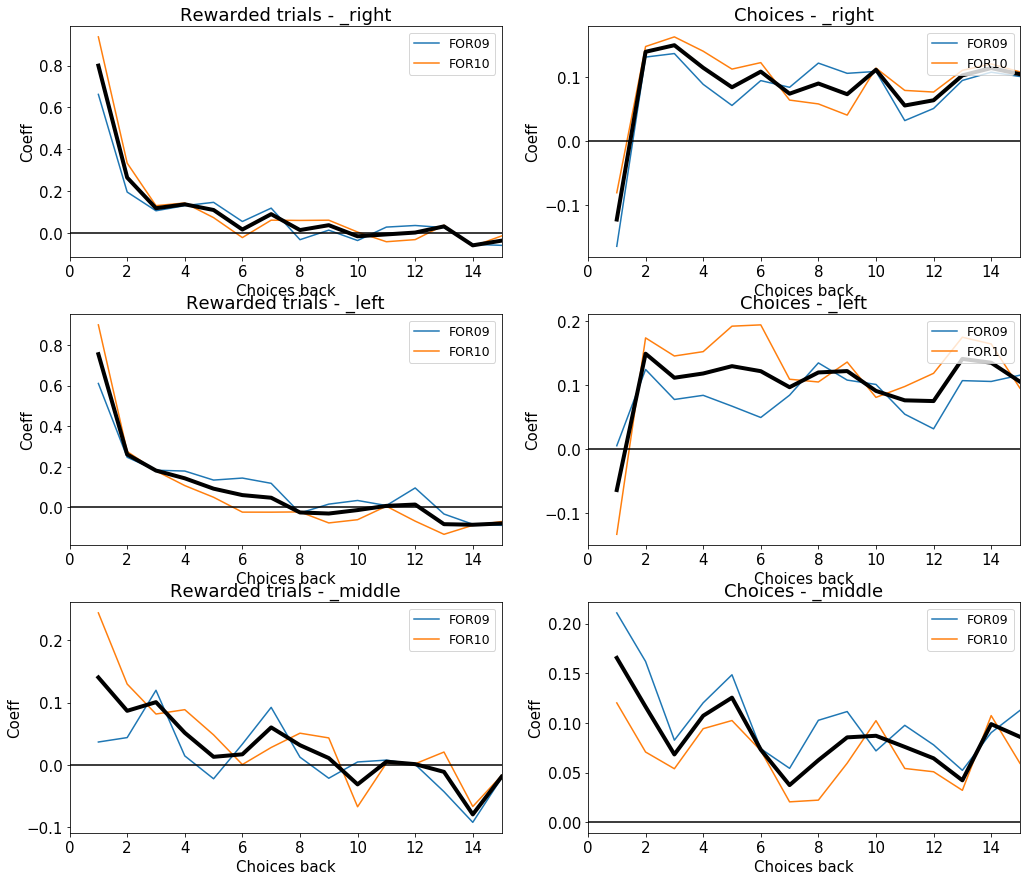

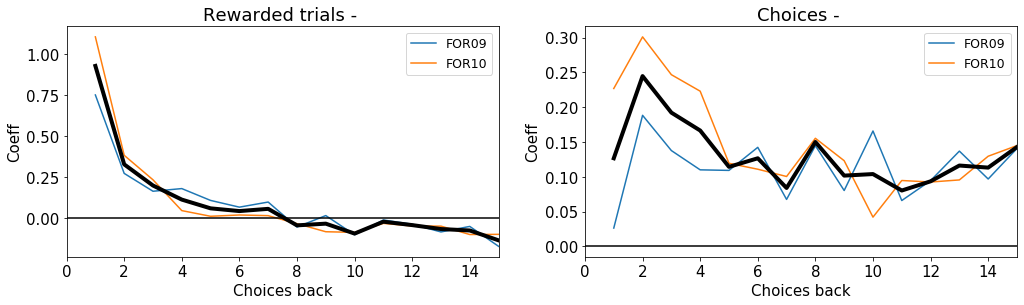

In [3]:
plot_regression_coefficients(plottype = 'RC',lickportnum = '3lp',subjects = ['FOR09','FOR10'])
plot_regression_coefficients(plottype = 'RC',lickportnum = '2lp',subjects = ['FOR09','FOR10'])

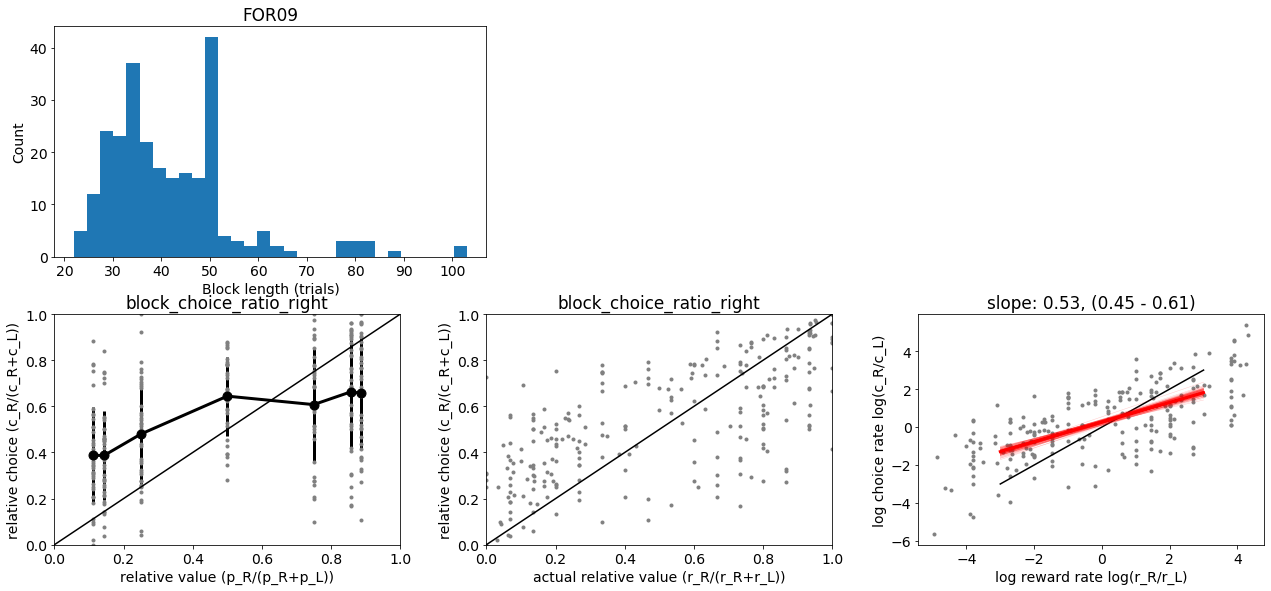

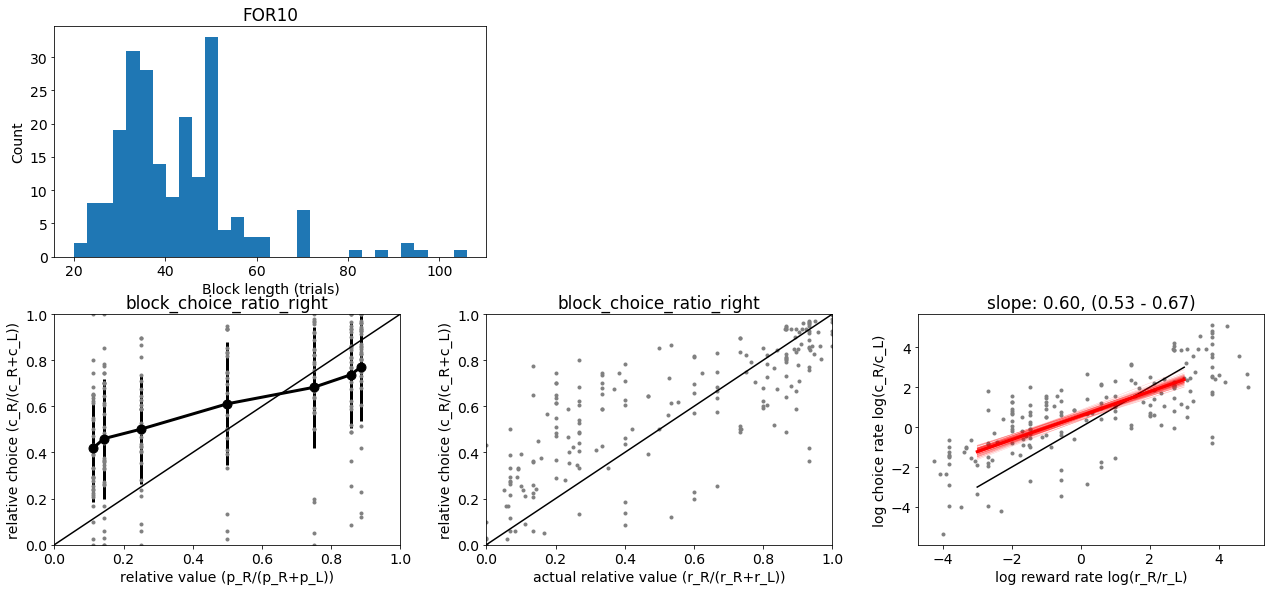

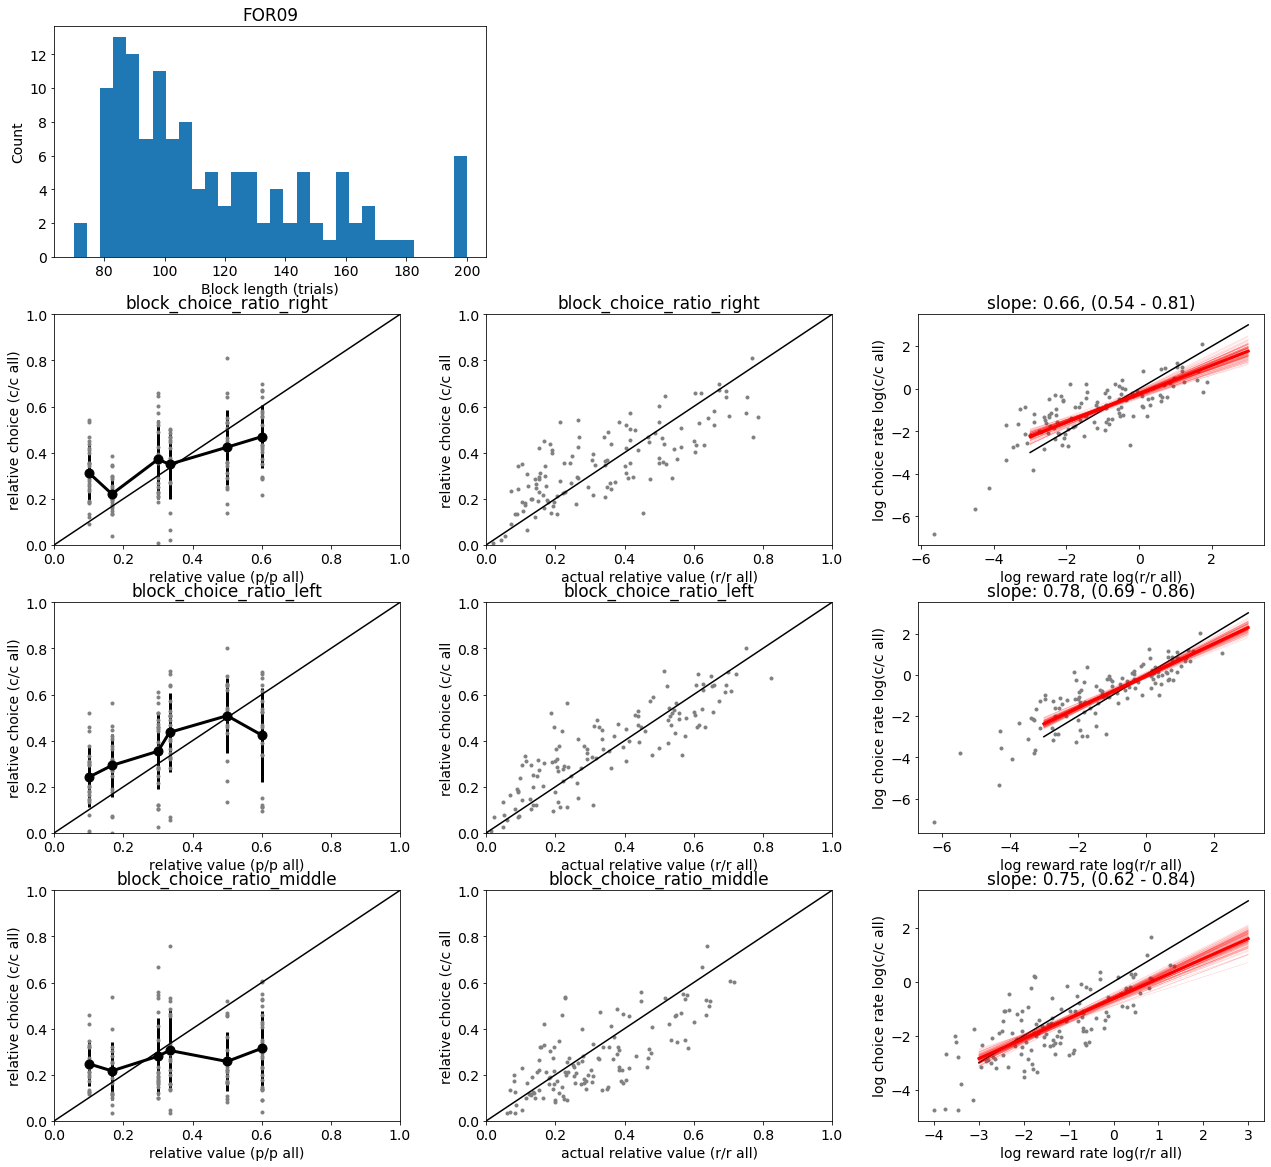

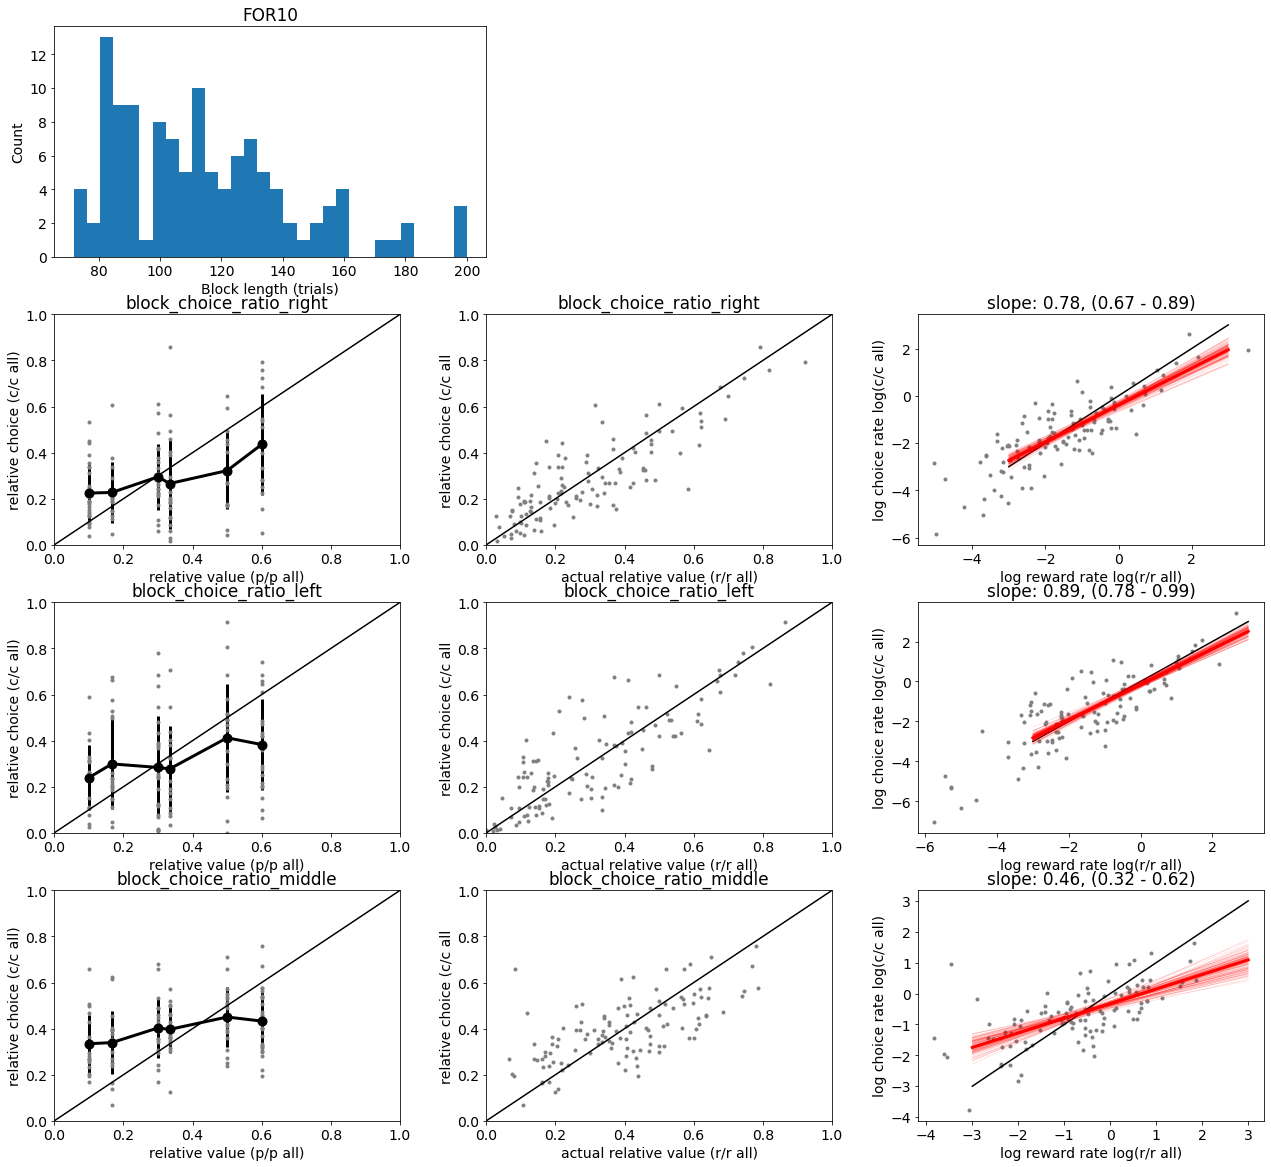

In [4]:
a = plot_block_based_tuning_curves(wr_name = 'FOR09',
                               minsession = 20,
                               mintrialnum = 20,
                               max_bias = 1,
                               bootstrapnum = 100,
                               only_blocks_above_median = False,
                               only_blocks_above_mean = False,
                               only_blocks_below_mean = False)
a = plot_block_based_tuning_curves(wr_name = 'FOR10',
                               minsession = 20,
                               mintrialnum = 20,
                               max_bias = 1,
                               bootstrapnum = 100,
                               only_blocks_above_median = False,
                               only_blocks_above_mean = False,
                               only_blocks_below_mean = False)
a = plot_block_based_tuning_curves_three_lickports(wr_name = 'FOR09',
                               minsession = 20,
                               mintrialnum = 70,
                               max_bias = 1,
                               bootstrapnum = 100,
                               only_blocks_above_median = False,
                               only_blocks_above_mean = False,
                               only_blocks_below_mean = False)
a = plot_block_based_tuning_curves_three_lickports(wr_name = 'FOR10',
                               minsession = 20,
                               mintrialnum = 70,
                               max_bias = 1,
                               bootstrapnum = 100,
                               only_blocks_above_median = False,
                               only_blocks_above_mean = False,
                               only_blocks_below_mean = False)

# Weight change and water consumption
All mice returned to baseline weight despite they drink little water..

/home/rozmar/Scripts/Python/DataPipeline/plot/plot_behavior.py:110: RuntimeWarning: invalid value encountered in long_scalars
  early_lick_rate = (df_earlylick == 'early').values.sum()/trialnum


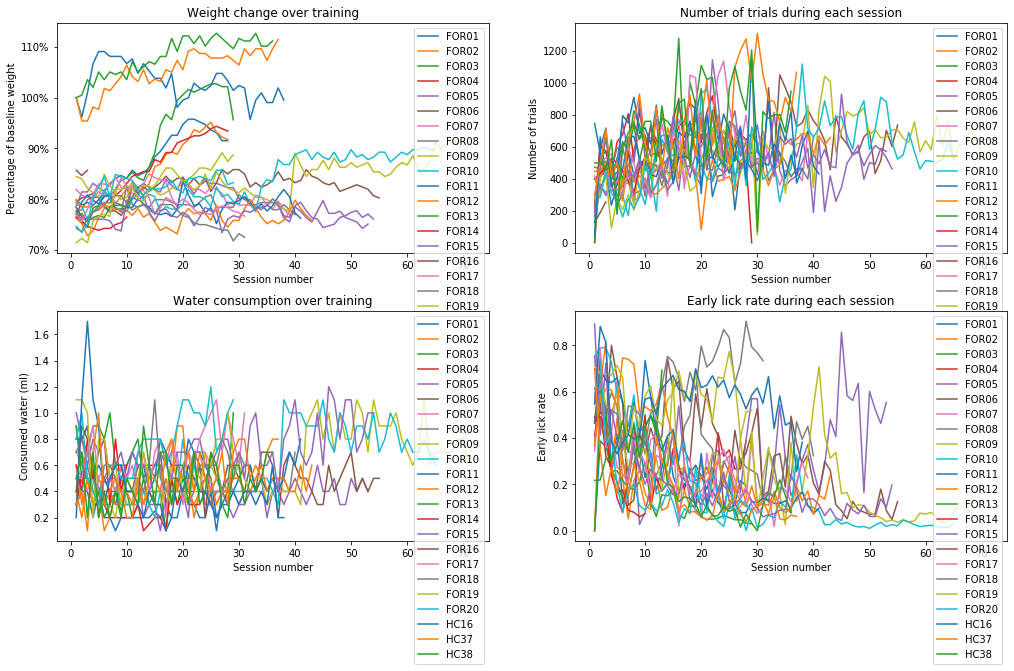

In [3]:
plot_weight_water_early_lick()

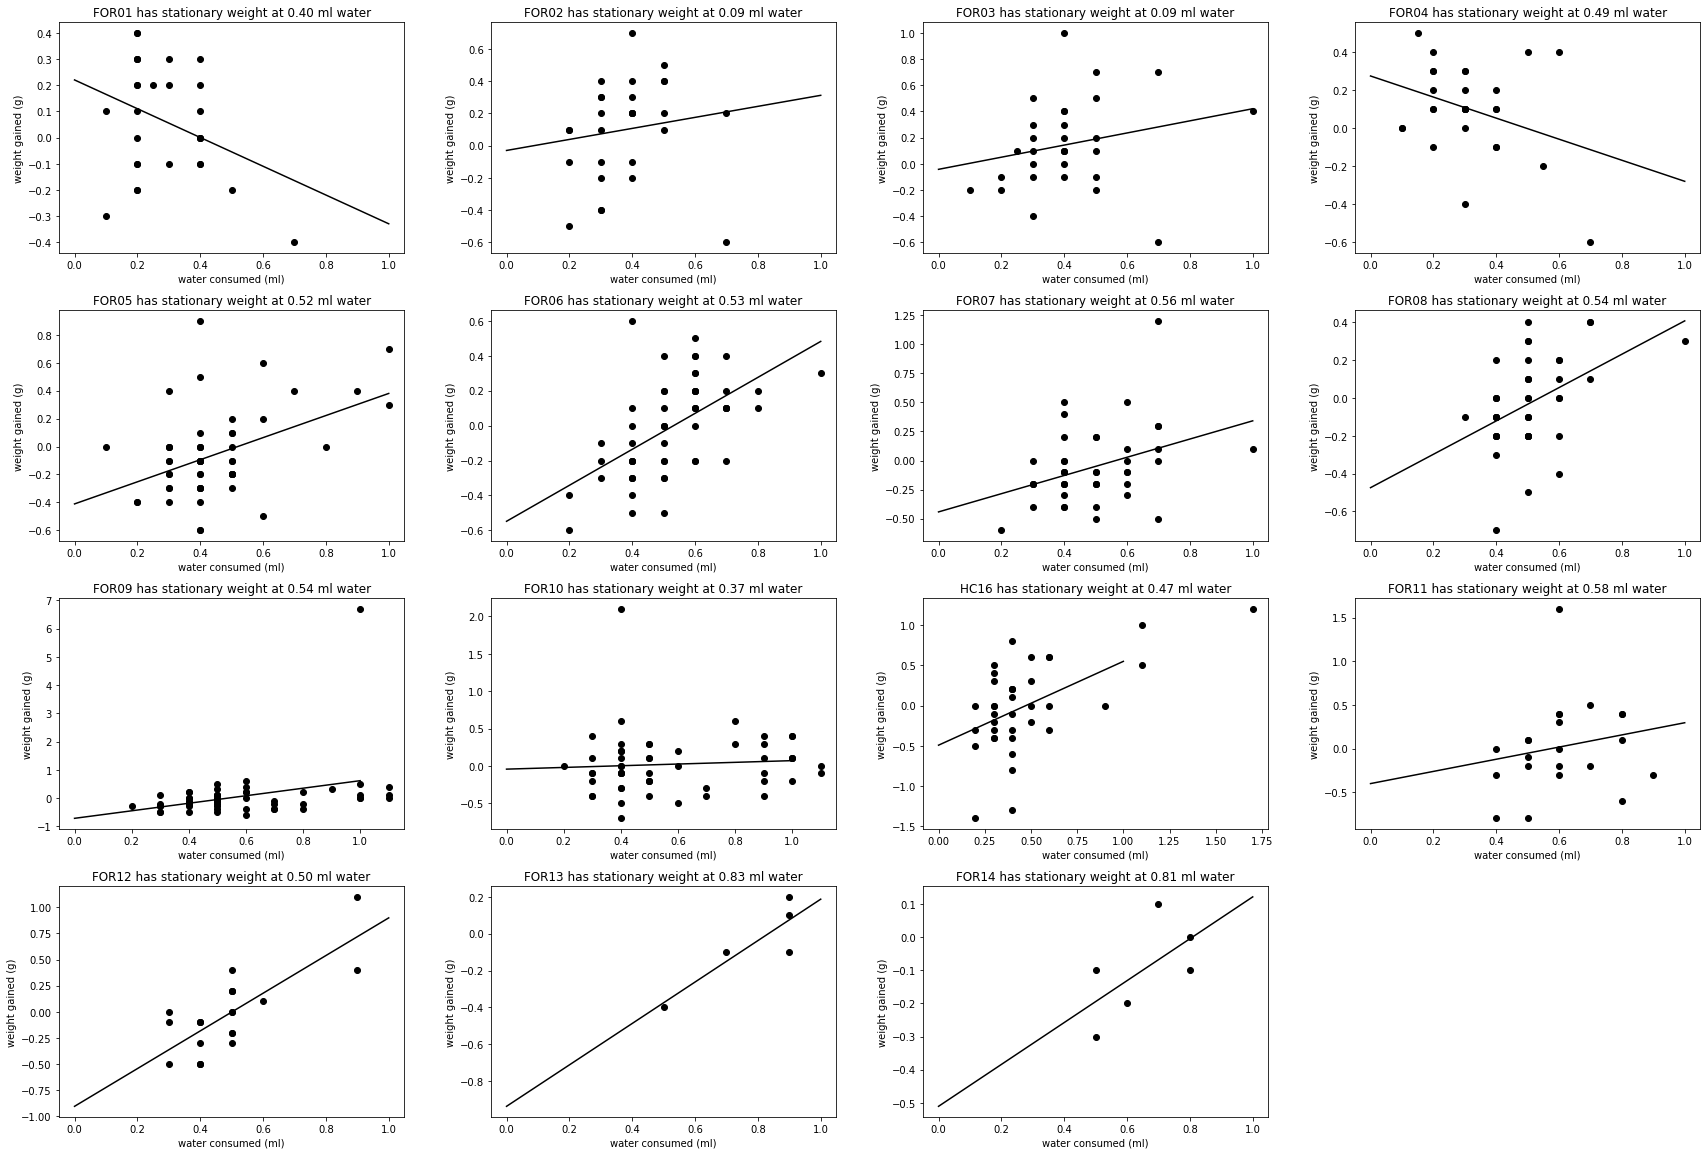

In [3]:
axess = list()
colnum = 4
fig=plt.figure()
df_surgery = pd.read_csv(dj.config['locations.metadata_behavior']+'Surgery.csv')
col = 0
row = 0
for ididx,ID in enumerate(df_surgery['ID']):
    try:
        df_now = pd.read_csv(dj.config['locations.metadata_behavior']+ID+'.csv')
        try:
            endidx = np.where(np.isnan(df_now['Weight']))[0][0]
        except:
            endidx = len(df_now)
        weightdiff = np.diff(df_now['Weight'][:endidx])
        prevwater = df_now['Extra water'][:endidx-1] + df_now['Water during training'][:endidx-1]
        needed = df_now['Training type'][:endidx-1] != 'restriction'
        prevwater = prevwater[needed]
        weightdiff = weightdiff[needed]
        p = np.polyfit(prevwater,weightdiff,1)
        if col >= colnum:
            col = 0
            row -= 1
        col +=1
        axess.append(fig.add_axes([col,row,.8,.8]))#axess.append(fig.add_axes([0,-ididx,1,.8]))
        axess[-1].plot(prevwater,weightdiff,'ko')
        axess[-1].plot([0,1],np.polyval(p,[0,1]),'k-')
        axess[-1].set_title(ID + ' has stationary weight at {0:.2f} ml water'.format(p[1]/p[0]*-1))
        axess[-1].set_xlabel('water consumed (ml)')
        axess[-1].set_ylabel('weight gained (g)')
        
    except:
        pass
        #print(ID+ ' has no water restriction table')

# Autowater
Autowater (water cue after multiple miss trials) was not used from week 2, except for FOR01 who had a huge bias on a few days
(autowater was turned on if the animal igored 10 trials in a row at the end of the session, these are the small bumps from the second week)

In [1]:
df_subject_wr=pd.DataFrame(lab.WaterRestriction() * experiment.Session() * experiment.SessionDetails)
subject_names = df_subject_wr['water_restriction_number'].unique()
subject_names.sort()
fig=plt.figure()
ax_autowater=fig.add_axes([0,0,1,.8])
for i,wr_name in enumerate(subject_names):
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+wr_name+'"').fetch('subject_id')[0]
    key = {'subject_id':subject_id}
    sessionnum = len(experiment.Session()&key)
    autowater_nums = list()
    
    for session in range(1,sessionnum+1):  
        key = {'session':session,'subject_id':subject_id}    
        autowater_num = len((experiment.TrialNote()&key))
        autowater_nums.append(autowater_num)
    ax_autowater.plot(range(1,len(autowater_nums)+1),autowater_nums)   #,linewidth=len(subject_names)+.5-i 
ax_autowater.legend(subject_names)
ax_autowater.set_xlabel('Session number')
ax_autowater.set_ylabel('Number of trials with autowater on')
ax_autowater.set_title('Autowater')   

NameError: name 'pd' is not defined

# reaction times for the last session:
The first two mice (Bari-Cohen training) are trying to guess the GO cue

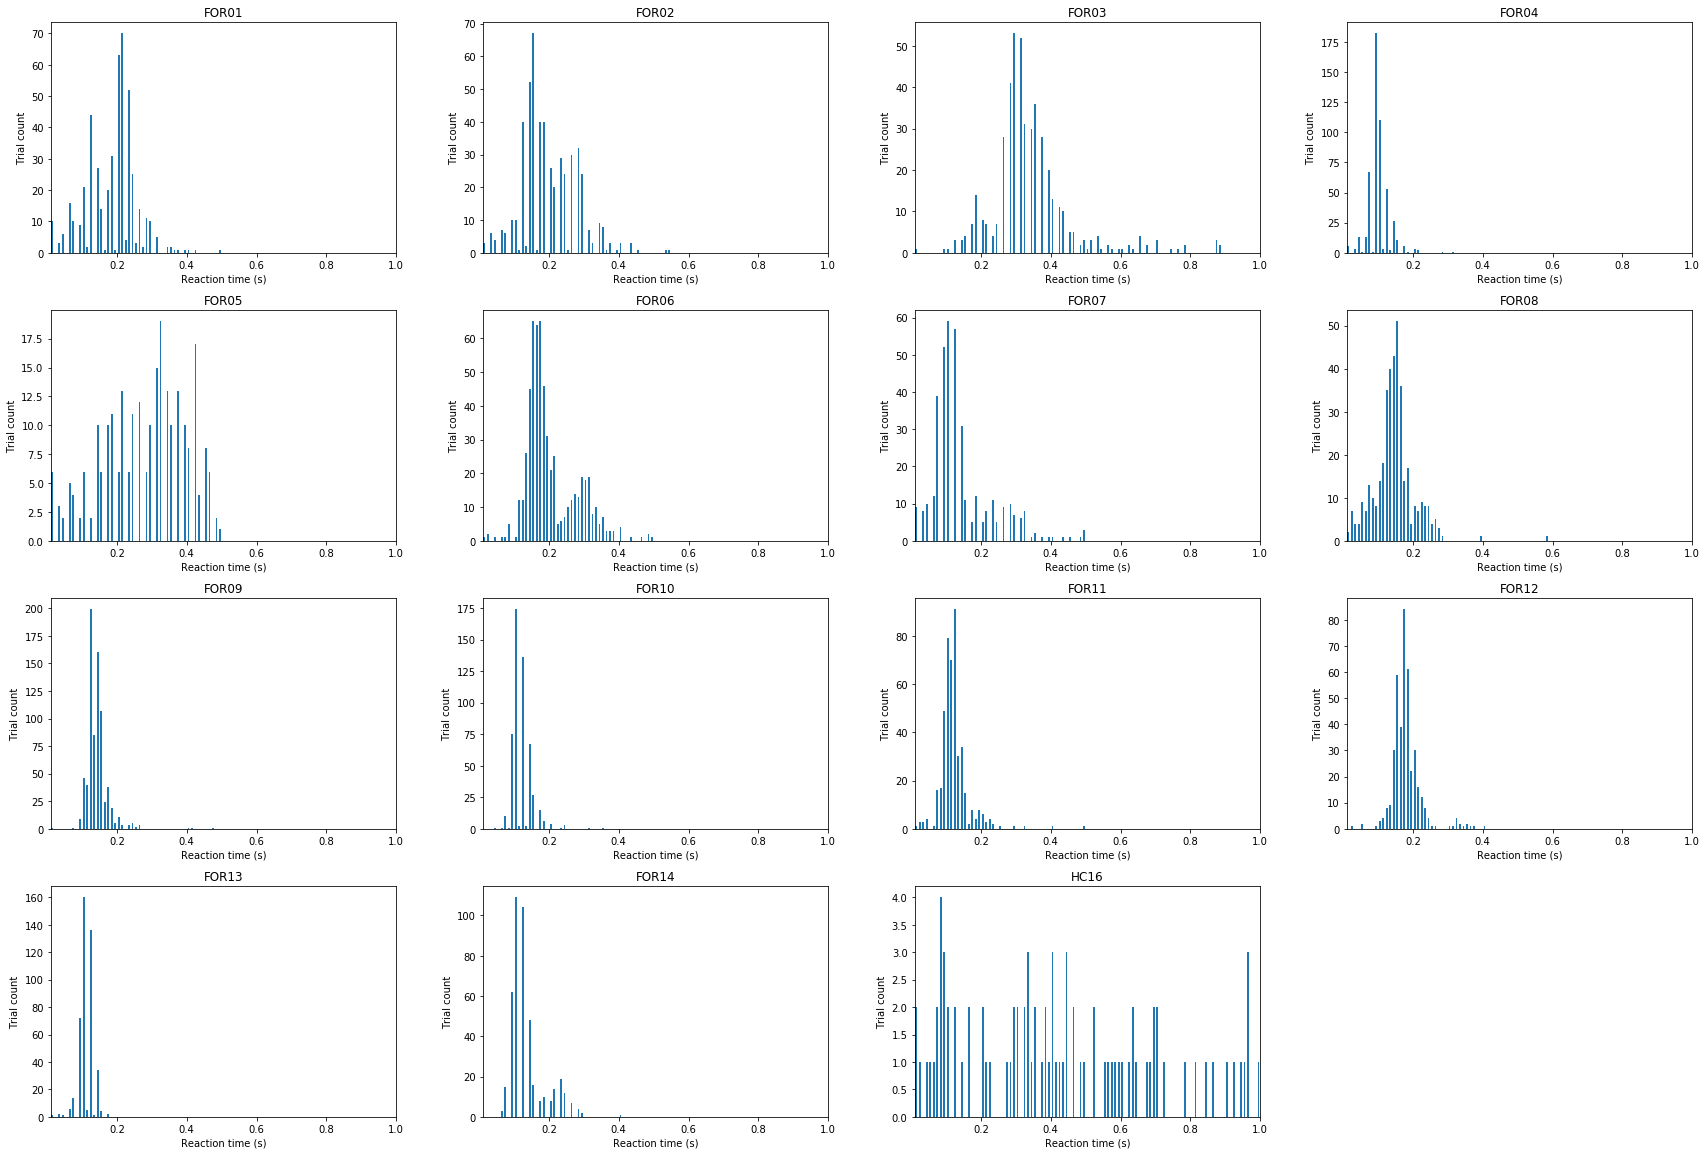

In [2]:
df_subject_wr=pd.DataFrame(lab.WaterRestriction() * experiment.Session() * experiment.SessionDetails)
subject_names = df_subject_wr['water_restriction_number'].unique()
subject_names.sort()

fig=plt.figure()
ax_RT = list()
colnum = 4
col = 0
row = 0
for i,subject in enumerate(subject_names):
    key = dict()
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+subject+'"').fetch('subject_id')[0]
    key['subject_id'] = subject_id
    session = (experiment.Session()&key).fetch('session').max()
    key['session'] = session
    df_reactiontime = pd.DataFrame((behavioranal.SessionReactionTimeHistogram() & key)*(lab.WaterRestriction &key))
    while len(df_reactiontime)<1:
        session -= 1
        key['session'] = session
        df_reactiontime = pd.DataFrame((behavioranal.SessionReactionTimeHistogram() & key)*(lab.WaterRestriction &key))
        
    if col >= colnum:
        col = 0
        row -= 1
    col +=1
    #ax_RT.append(fig.add_axes([np.floor((i/4)%4),-1*(i%4),.8,.8]))
    ax_RT.append(fig.add_axes([col,row,.8,.8]))
    idx = df_reactiontime['water_restriction_number'] == subject
    bins = df_reactiontime['reaction_time_bins'][idx].values[0][1:]
    edges = [np.min(bins),np.max(bins)]
    bins = bins - (bins[1] -bins[0])/2
    vals = df_reactiontime['reaction_time_values_all_trials'][idx].values.tolist()[0]
    ax_RT[-1].bar(bins,vals, (bins[1] -bins[0])/2)
    ax_RT[-1].set_xlim(edges)
    ax_RT[-1].set_title(subject)
    ax_RT[-1].set_xlabel('Reaction time (s)')
    ax_RT[-1].set_ylabel('Trial count')

# Number of licks on miss trials after the first lick in each session:
(if the retraction is fast enough, it should be 0)  
Sessions 1-7 : softcode and slow motor movement  
Sessions 7-11 : softcode and fast motor movement  
Sessions 12-19: same as above but two bpods controlled from the same PC  
Sessions 19- : zaber motor is directly triggered  

Text(0.5, 1.0, 'Lick count on miss trials')

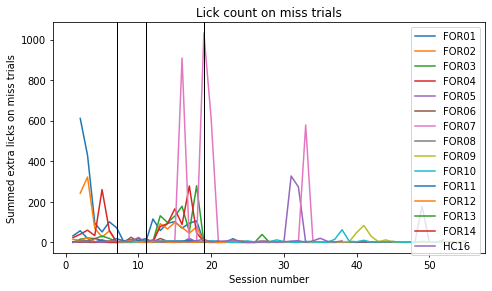

In [6]:
#%% licks on miss trials

df_subject_wr=pd.DataFrame(lab.WaterRestriction() * experiment.Session() * experiment.SessionDetails)
subject_names = df_subject_wr['water_restriction_number'].unique()
subject_names.sort()


df_misslicknums = pd.DataFrame()
fig=plt.figure()
ax_misslick = fig.add_axes([0,0,1,.8])
for wr_name in subject_names:
    #%
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+wr_name+'"').fetch('subject_id')[0]
    key = {'subject_id':subject_id}   
    df_lickrhythm = pd.DataFrame((behavioranal.SessionLickRhythmHistogram() & key)*(lab.WaterRestriction &key))
    #%
    
    sessionnum = list()
    licknum = list()
    if len(df_lickrhythm)>0:
        for i,session in enumerate(df_lickrhythm['session']):
            idx = df_lickrhythm['session'] == session
            bins = df_lickrhythm['lick_rhythm_bins'][idx].values[0][1:]
            edges = [np.min(bins),np.max(bins)]
            bins = bins - (bins[1] -bins[0])/2 
            vals = df_lickrhythm['lick_rhythm_values_miss_trials'][idx].values.tolist()[0]
            sessionnum.append(session)
            licknum.append(vals[bins>.015].sum())       
        ax_misslick.plot(sessionnum,licknum)
protocolchanges = [7,11,19]
ylimedges = ax_misslick.get_ylim()
ax_misslick.plot(protocolchanges,np.ones(len(protocolchanges))*np.mean(ylimedges),'k|',markersize = np.diff(ylimedges))
ax_misslick.set_ylabel('Summed extra licks on miss trials')
ax_misslick.set_xlabel('Session number')
ax_misslick.legend(subject_names)
ax_misslick.set_title('Lick count on miss trials')


In [10]:
slopedata = list()
df_subject_wr=pd.DataFrame(lab.WaterRestriction() * experiment.Session())
subject_names = df_subject_wr['water_restriction_number'].unique()
subject_names.sort()

for wr_name in subject_names:
    metricnames_xaxes, slopes, slopes_ci,allslopes = plot_block_based_tuning_curves_three_lickports(wr_name = wr_name,
                                                                                    max_bias = 1,
                                                                                    bootstrapnum = 100,
                                                                                    only_blocks_above_median = False,
                                                                                    only_blocks_above_mean = False,
                                                                                    only_blocks_below_mean = False)
    print(wr_name)
    if len(allslopes) > 0:
        slopedata.append({'wr_name':wr_name,
                          'metricnames_xaxes':metricnames_xaxes,
                          'slopes':slopes,
                          'slopes_ci':slopes_ci,
                          'allslopes':allslopes,
                         })
fig=plt.figure()
axs = list()
diffaxs = list()
for i,slopedict in enumerate(slopedata):
    axs.append(fig.add_axes([0,-i,1.5,.8]))
    wr_name = slopedict['wr_name']
    axs[-1].plot(slopedict['metricnames_xaxes'],slopedict['slopes'],'ko')
    axs[-1].errorbar(slopedict['metricnames_xaxes'],slopedict['slopes'],np.abs(np.asarray(slopedict['slopes_ci']).T-np.asarray(slopedict['slopes'])),color='black')
    axs[-1].set_title(wr_name)
    axs[-1].set_ylabel('slope')
    
    slopediffs = list()
    slopediffs_ci = list()
    for idx,allslopes in enumerate(slopedict['allslopes']):
        if idx>1:
            prevslopes = slopedict['allslopes'][idx-1]
            slopediff = allslopes-prevslopes
            slopediffs.append(np.mean(slopediff))
            slopediffs_ci.append(np.percentile(slopediff, [2.5, 97.5]))
    diffaxs.append(fig.add_axes([1.8,-i,.8,.8]))
    diffaxs[-1].plot(['first to second tertile','second to third tertile'],slopediffs,'ko')
    diffaxs[-1].errorbar(['first to second tertile','second to third tertile'],slopediffs,np.abs(np.asarray(slopediffs_ci).T-np.asarray(slopediffs)),color='black',fmt='none')
    diffaxs[-1].plot(['first to second tertile','second to third tertile'],[0,0],'k--')
    diffaxs[-1].set_ylabel('Change in slope')

FOR01
FOR02
FOR03
FOR04
FOR05
FOR06
FOR07
FOR08
FOR09
FOR10
FOR11
FOR12
FOR13
FOR14
HC16


<Figure size 432x288 with 0 Axes>

TypeError: unsupported operand type(s) for +: 'decimal.Decimal' and 'NoneType'

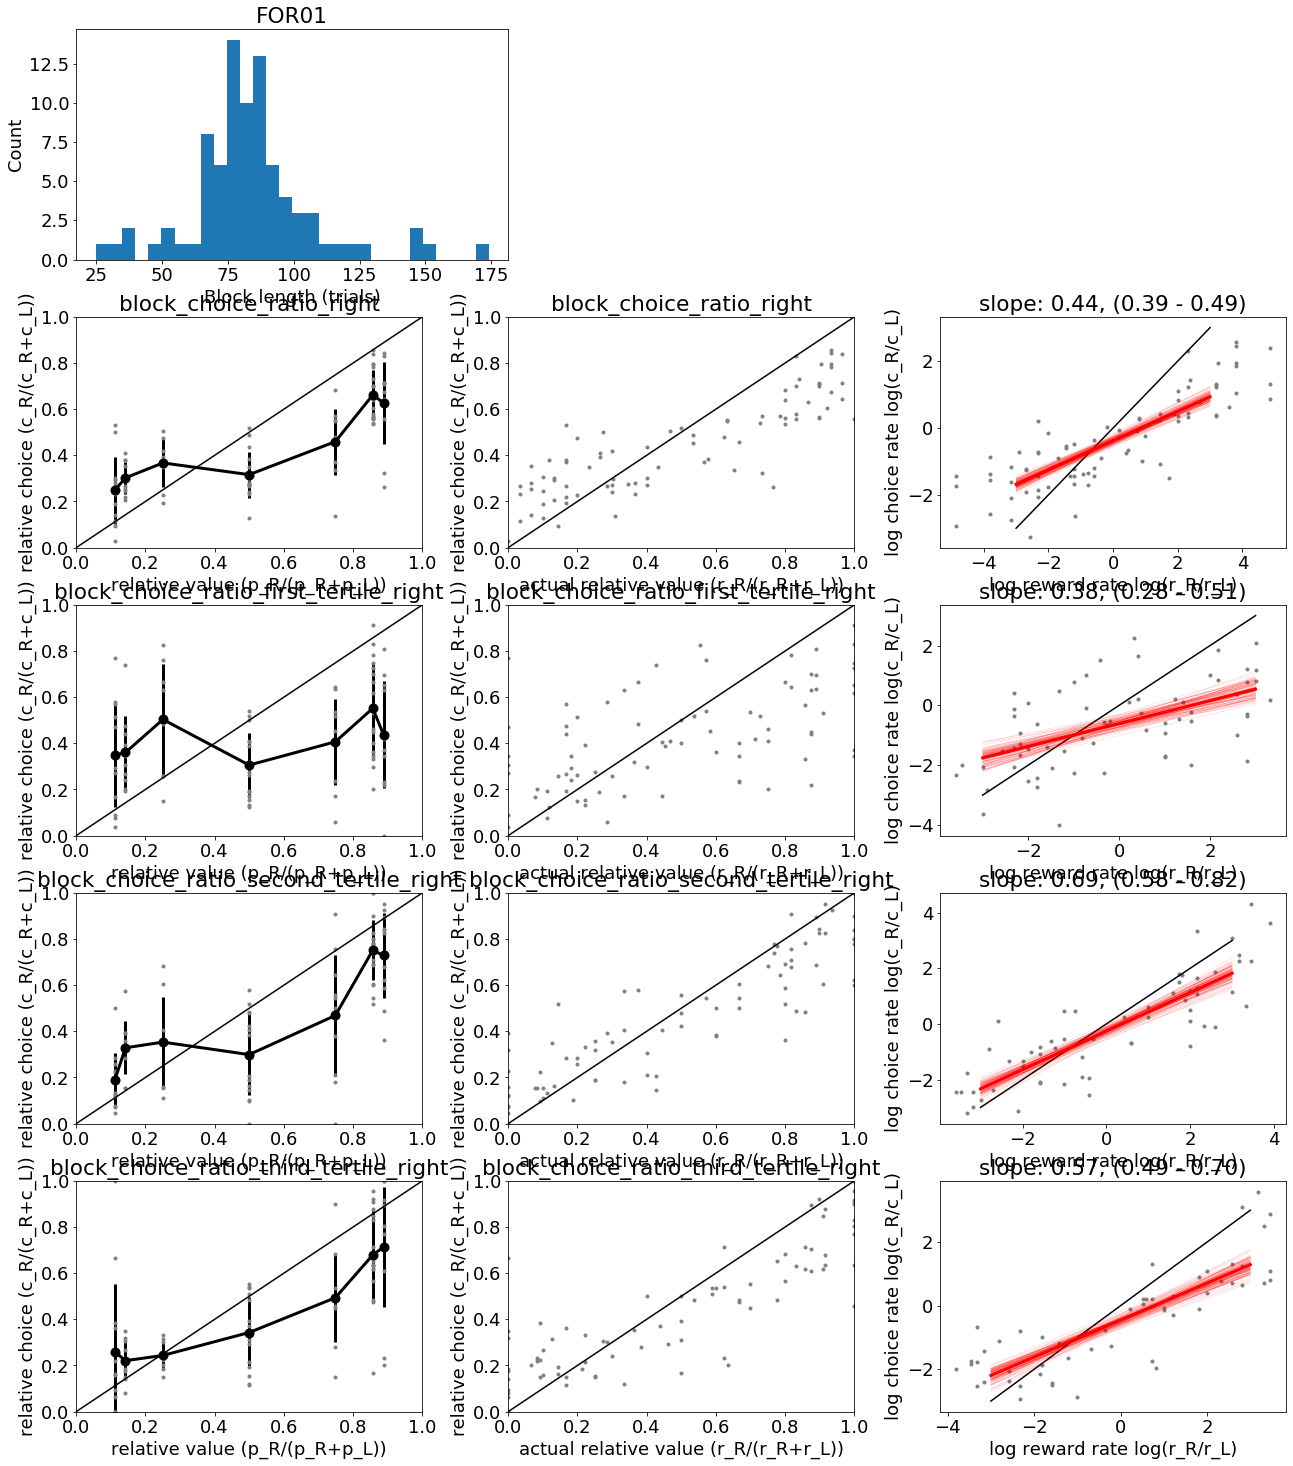

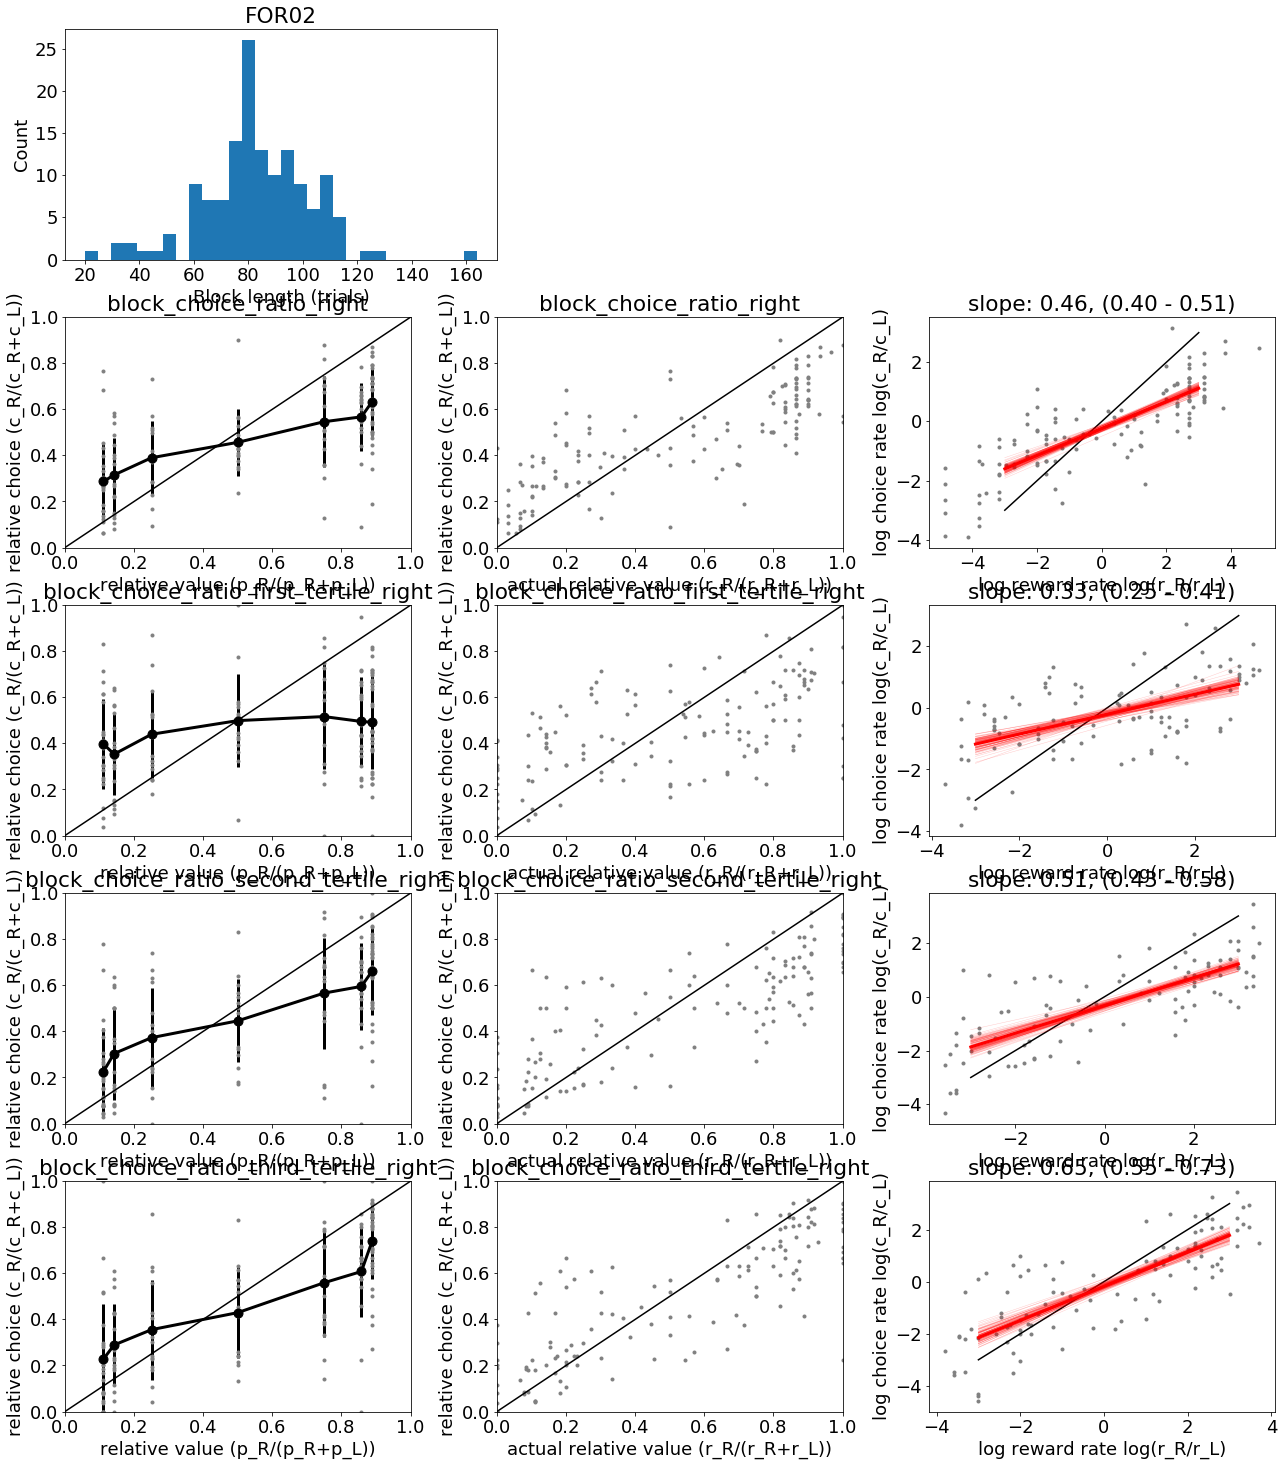

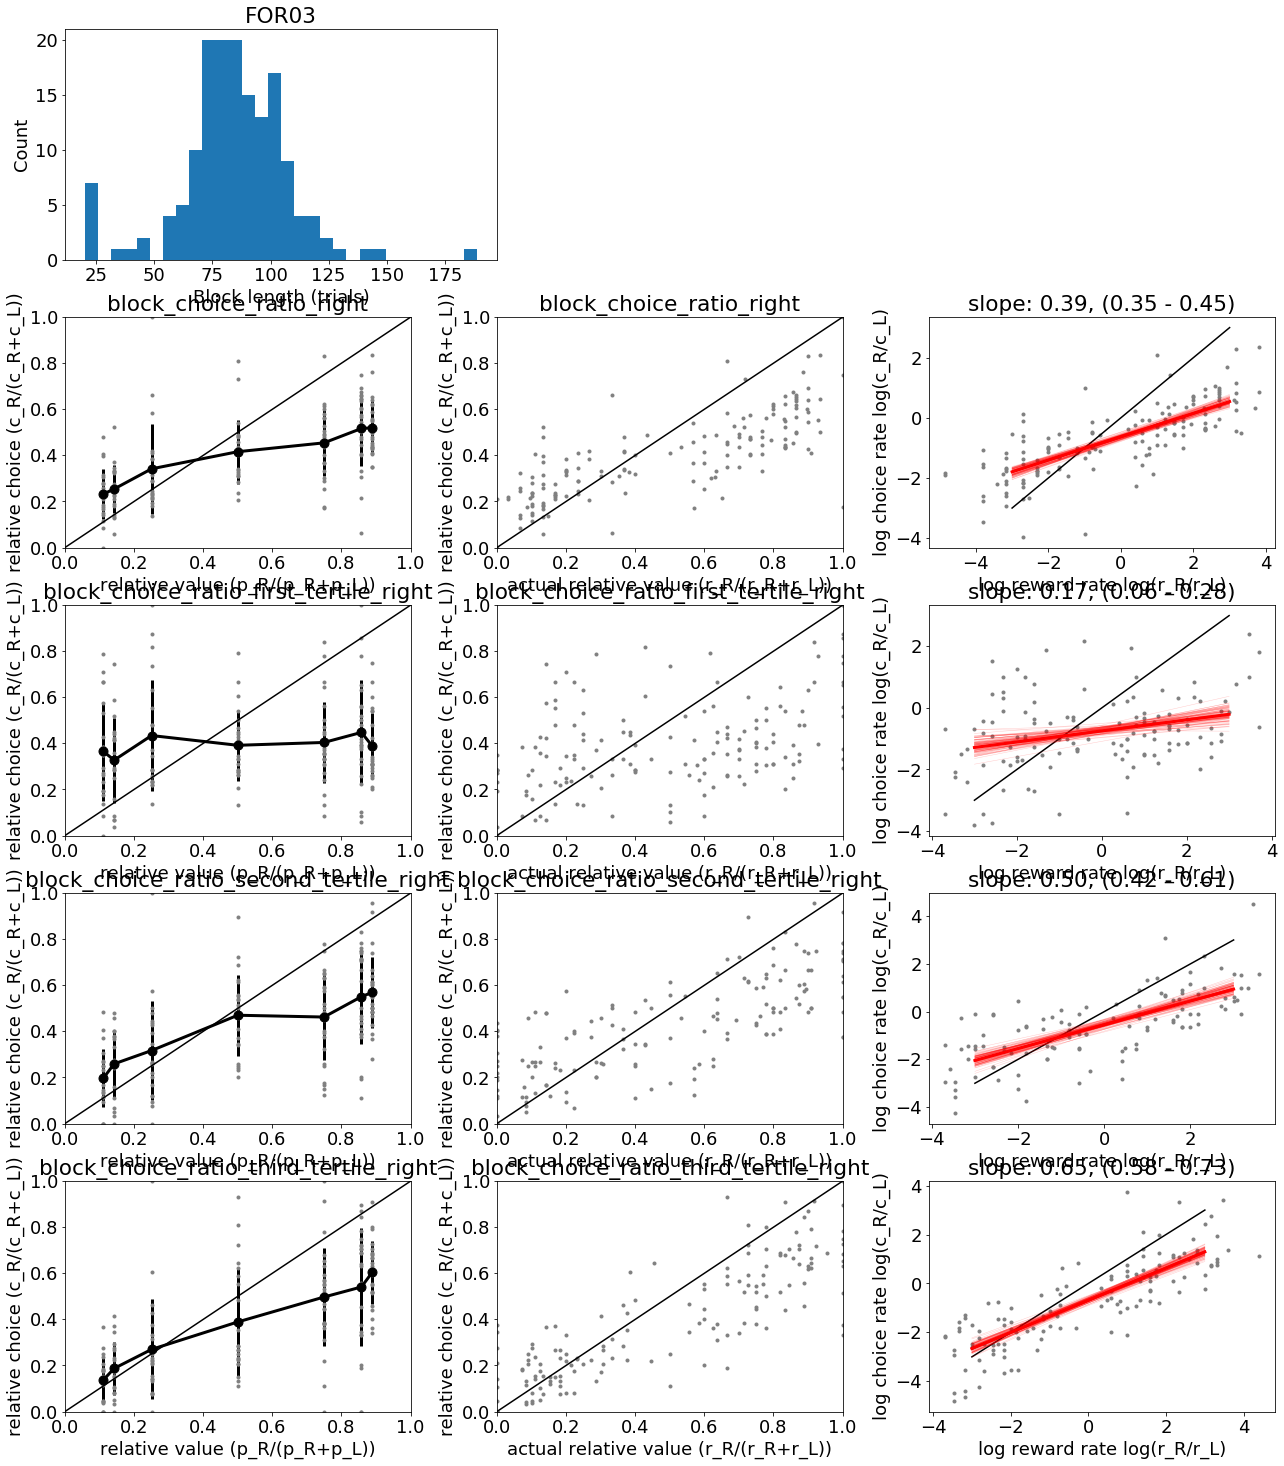

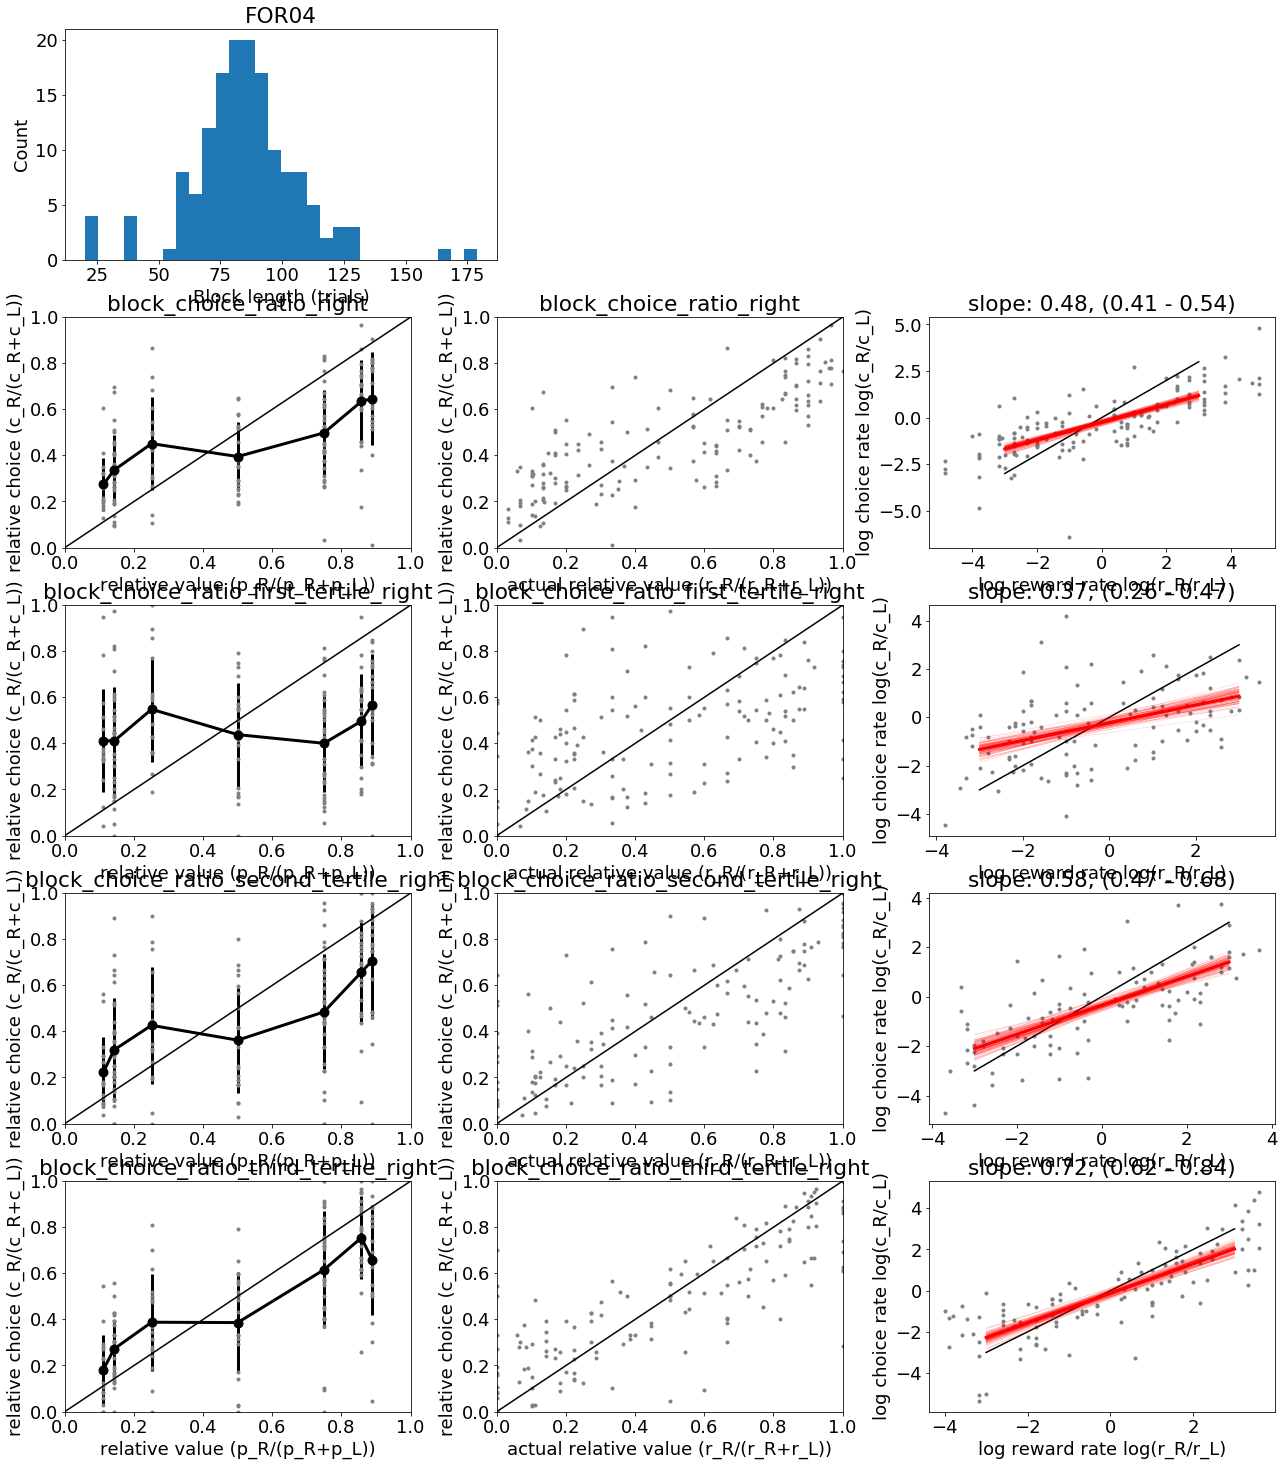

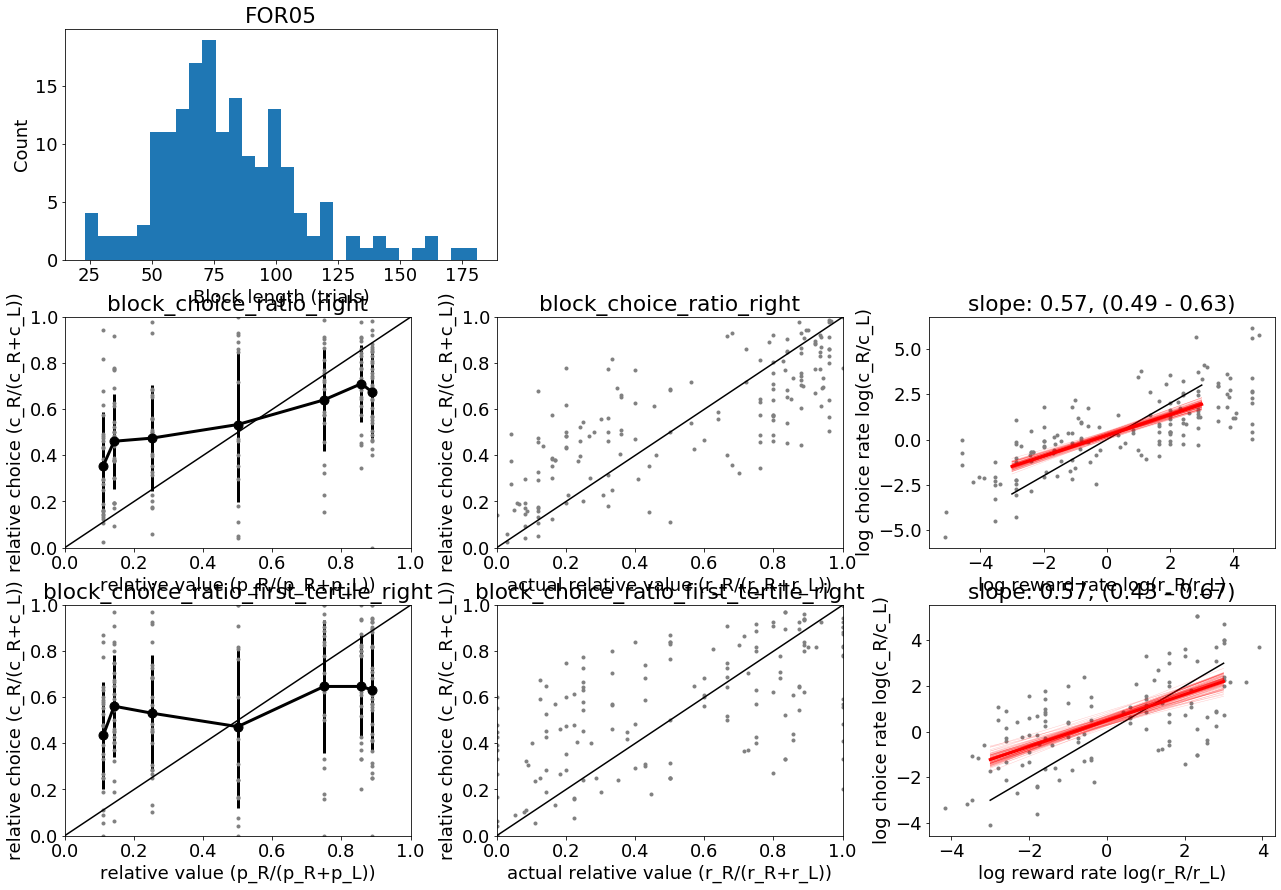

In [11]:
slopedata = list()
df_subject_wr=pd.DataFrame(lab.WaterRestriction() * experiment.Session())
subject_names = df_subject_wr['water_restriction_number'].unique()
subject_names.sort()

for wr_name in subject_names:
    metricnames_xaxes, slopes, slopes_ci,allslopes = plot_block_based_tuning_curves(wr_name = wr_name,
                                                                                    max_bias = 1,
                                                                                    bootstrapnum = 100,
                                                                                    only_blocks_above_median = False,
                                                                                    only_blocks_above_mean = False,
                                                                                    only_blocks_below_mean = False)
    slopedata.append({'wr_name':wr_name,
                      'metricnames_xaxes':metricnames_xaxes,
                      'slopes':slopes,
                      'slopes_ci':slopes_ci,
                      'allslopes':allslopes,
                     })
fig=plt.figure()
axs = list()
diffaxs = list()
for i,slopedict in enumerate(slopedata):
    axs.append(fig.add_axes([0,-i,1.5,.8]))
    wr_name = slopedict['wr_name']
    axs[-1].plot(slopedict['metricnames_xaxes'],slopedict['slopes'],'ko')
    axs[-1].errorbar(slopedict['metricnames_xaxes'],slopedict['slopes'],np.abs(np.asarray(slopedict['slopes_ci']).T-np.asarray(slopedict['slopes'])),color='black')
    axs[-1].set_title(wr_name)
    axs[-1].set_ylabel('slope')
    
    slopediffs = list()
    slopediffs_ci = list()
    for idx,allslopes in enumerate(slopedict['allslopes']):
        if idx>1:
            prevslopes = slopedict['allslopes'][idx-1]
            slopediff = allslopes-prevslopes
            slopediffs.append(np.mean(slopediff))
            slopediffs_ci.append(np.percentile(slopediff, [2.5, 97.5]))
    diffaxs.append(fig.add_axes([1.8,-i,.8,.8]))
    diffaxs[-1].plot(['first to second tertile','second to third tertile'],slopediffs,'ko')
    diffaxs[-1].errorbar(['first to second tertile','second to third tertile'],slopediffs,np.abs(np.asarray(slopediffs_ci).T-np.asarray(slopediffs)),color='black',fmt='none')
    diffaxs[-1].plot(['first to second tertile','second to third tertile'],[0,0],'k--')
    diffaxs[-1].set_ylabel('Change in slope')

KeyError: 'coefficients_rewards_subject_right'

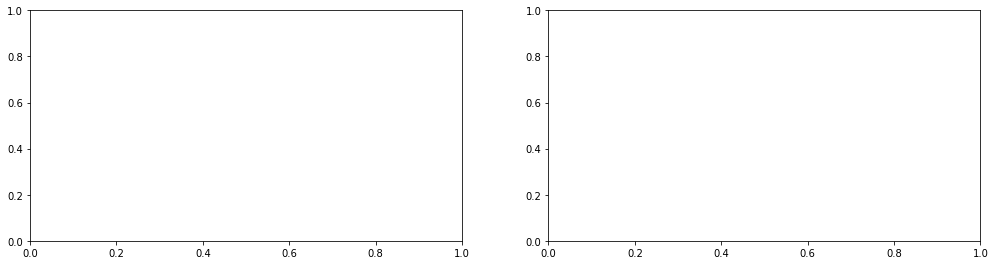

In [3]:
# rewarded unrewarded and choices

plot_regression_coefficients(plottype = 'RC',lickportnum = '2lp')
    


# Logistic regression from week 2

/home/rozmar/anaconda3/envs/datajoint/lib/python3.7/site-packages/scipy/optimize/minpack.py:799: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/rozmar/anaconda3/envs/datajoint/lib/python3.7/site-packages/scipy/optimize/minpack.py:799: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


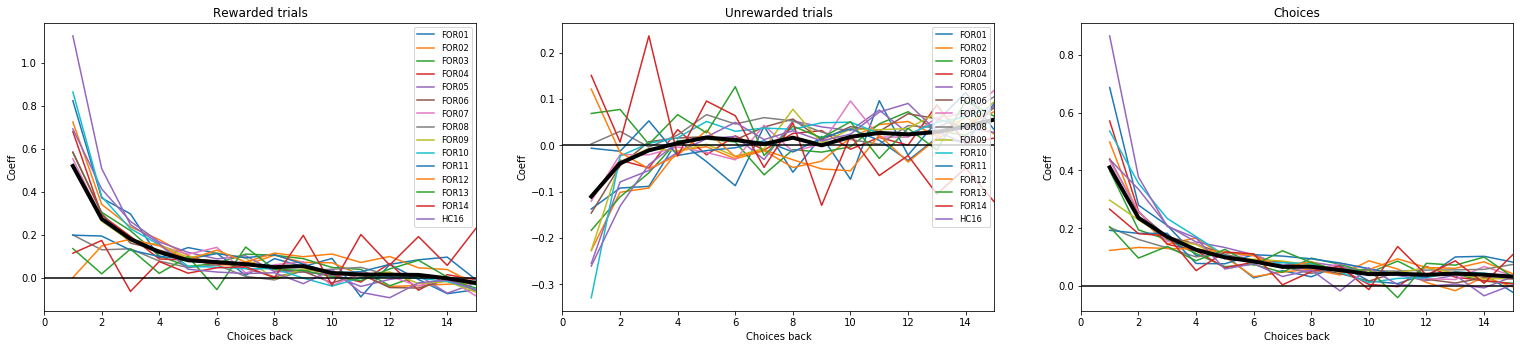

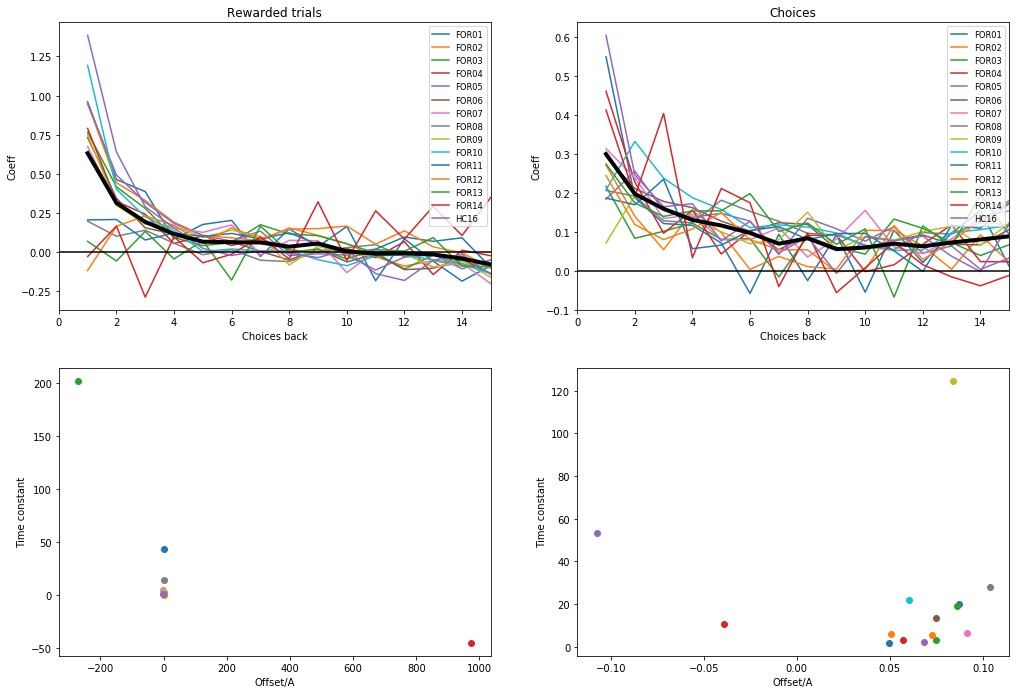

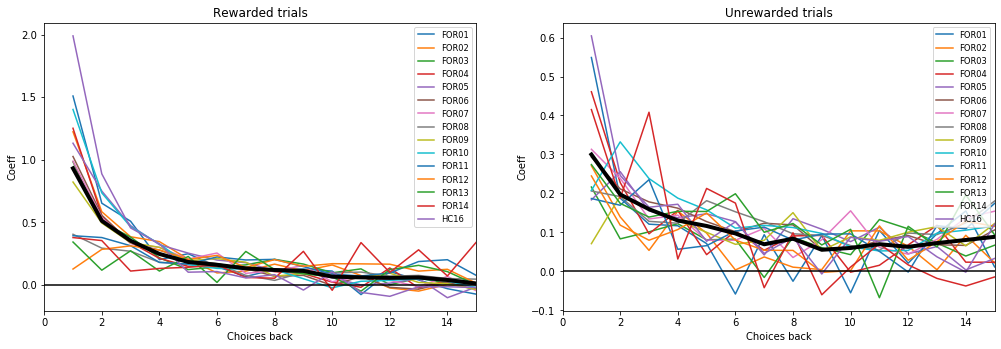

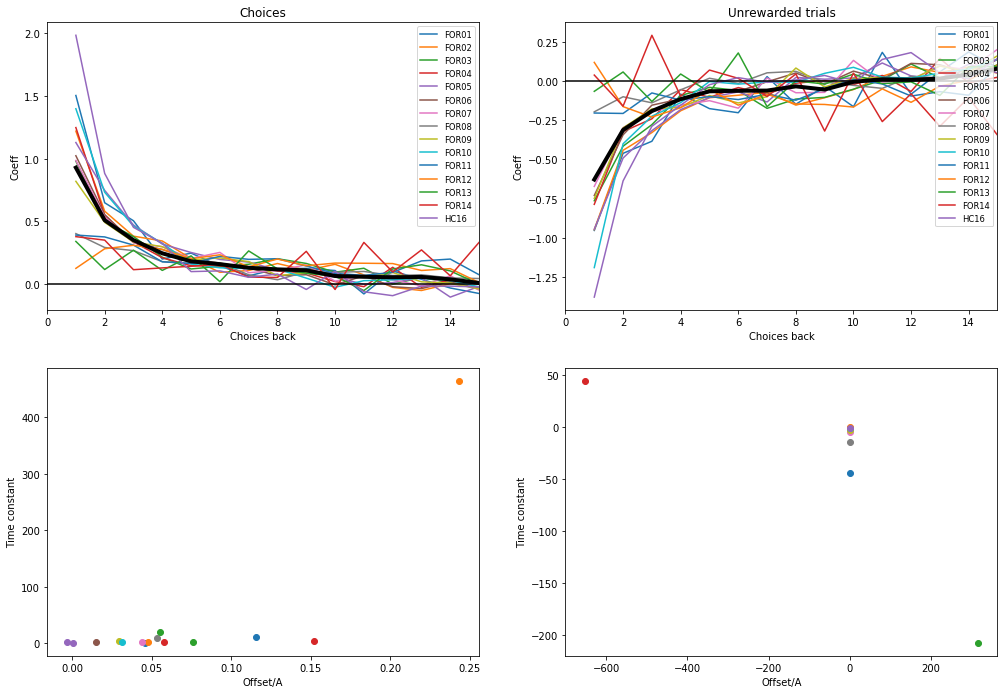

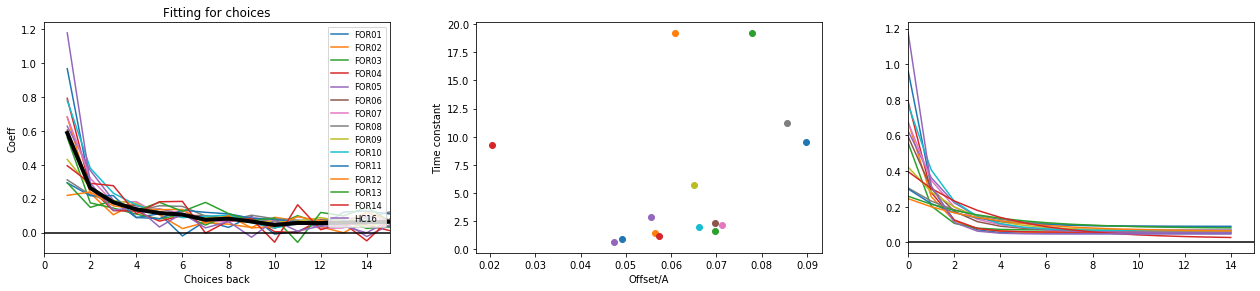

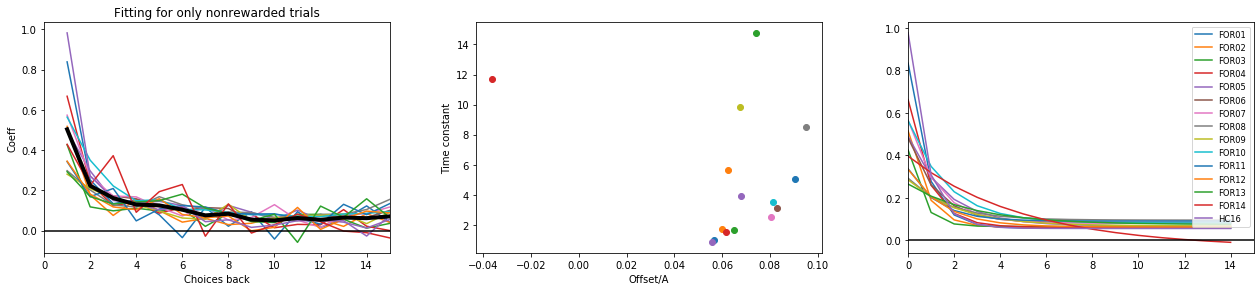

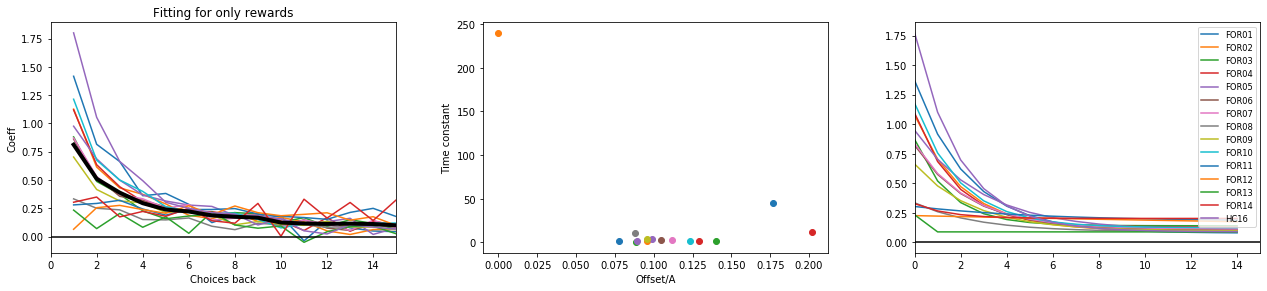

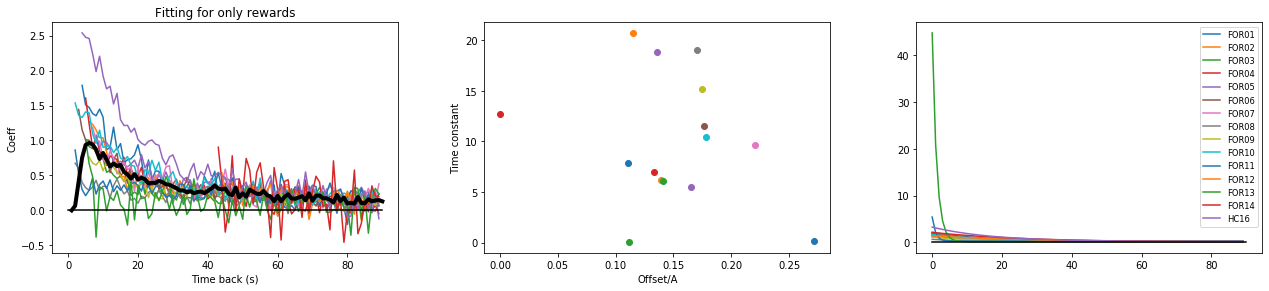

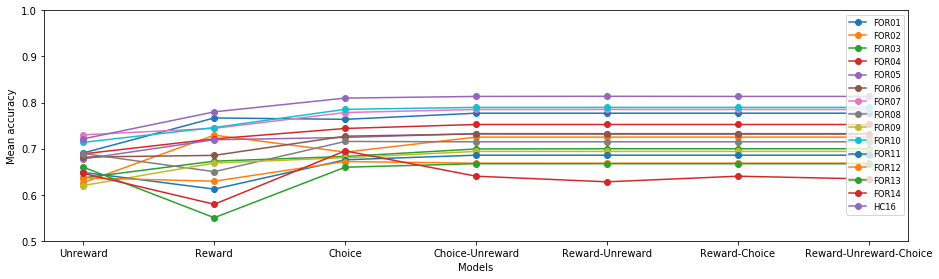

In [4]:
# rewarded unrewarded and choices

trialstoshow = 15
trialstofit = 15
df_subject_wr=pd.DataFrame(lab.WaterRestriction() * experiment.Session()* experiment.SessionDetails())
subject_names = df_subject_wr['water_restriction_number'].unique()
subject_names.sort()


#subject_names = np.append(subject_names,['leaky3t.05c30h', 'leaky3t.05c15h','leaky3t5it30h', 'leaky3t3it30h',  'cheater'])#'W-St-L-Rnd','W-St-L-Sw', 'leaky3t.05c5h', 
#subject_names=['leaky3t.05c30h', 'leaky3t.05c15h', 'leaky3t.05c5h', 'leaky3t5it30h', 'leaky3t3it30h', 'W-St-L-Rnd','W-St-L-Sw', 'cheater']
#subject_names=['leaky3t.05c30h', 'leaky3t.05c15h','leaky3t5it30h', 'leaky3t3it30h']


df_coeff = pd.DataFrame(behavioranal.SubjectFittedChoiceCoefficientsRNRC())
fig=plt.figure()
ax1=fig.add_axes([0,0,1,1])  
ax2=fig.add_axes([1.2,0,1,1]) 
ax3=fig.add_axes([2.4,0,1,1])

subject_names_legend = list()
for wr_name in subject_names:
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+wr_name+'"').fetch('subject_id')[0]
    idx = df_coeff['subject_id']==subject_id
    if sum(idx) == 1:
        ax1.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][idx].values[0])
        ax2.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_nonrewards_subject'][idx].values[0])
        ax3.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_choices_subject'][idx].values[0])
        
        subject_names_legend.append(wr_name)

ax1.set_xlabel('Choices back')
ax1.set_ylabel('Coeff')
ax1.set_title('Rewarded trials')
ax1.legend(subject_names,fontsize='small',loc = 'upper right')
ax2.set_xlabel('Choices back')
ax2.set_ylabel('Coeff')
ax2.set_title('Unrewarded trials')
ax3.set_xlabel('Choices back')
ax3.set_ylabel('Coeff')
ax3.set_title('Choices')
ax2.legend(subject_names_legend,fontsize='small',loc = 'upper right')
ax1.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax2.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_nonrewards_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax3.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_choices_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax1.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')
ax2.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')
ax3.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')


ax1.set_xlim([0, trialstoshow])
ax2.set_xlim([0, trialstoshow])
ax3.set_xlim([0, trialstoshow])
#template_1 = df_coeff['coefficients_rewards_subject'].mean()
#template_1[template_1<0]=0
#template_1 = template_1/sum(template_1)
#print(template_1)








# rewarded and choices
df_coeff = pd.DataFrame(behavioranal.SubjectFittedChoiceCoefficientsRC())
fig=plt.figure()
ax1=fig.add_axes([0,0,1,1])  
ax2=fig.add_axes([1.2,0,1,1]) 
ax11=fig.add_axes([0,-1.2,1,1])  
ax22=fig.add_axes([1.2,-1.2,1,1]) 
subject_names_legend = list()
param_a1 = list()
param_b1 = list()
param_c1 = list()

param_a2 = list()
param_b2 = list()
param_c2 = list()
for wr_name in subject_names:
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+wr_name+'"').fetch('subject_id')[0]
    idx = df_coeff['subject_id']==subject_id
    if sum(idx) == 1:
        subject_names_legend.append(wr_name)
        ax1.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][idx].values[0])
        try:
            #xvals = list(range(0,len(df_coeff['coefficients_choices_subject'].mean())))
            #yvals = df_coeff['coefficients_choices_subject'][idx].values[0]
            xvals = list(range(0,trialstofit))
            yvals = df_coeff['coefficients_rewards_subject'][idx].values[0][:trialstofit]
            out = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t/b)+c,  xvals,  yvals)#,bounds=(0, [np.inf,np.inf,np.inf])
        except:
            out = list()
        if len(out)>0:
            param_a1.append(out[0][0])
            param_b1.append(out[0][1])
            param_c1.append(out[0][2])
            xvals = np.asarray(range(0,len(df_coeff['coefficients_rewards_subject'].mean())))
            yvals = out[0][0]*np.exp(-xvals/out[0][1])+out[0][2]
           # ax11.plot(xvals,yvals) 
        
        ax2.plot(range(1,len(df_coeff['coefficients_choices_subject'].mean())+1),df_coeff['coefficients_choices_subject'][idx].values[0])
        
        try:
            #xvals = list(range(0,len(df_coeff['coefficients_nonrewards_subject'].mean())))
            #yvals = df_coeff['coefficients_nonrewards_subject'][idx].values[0]
            xvals = list(range(0,trialstofit))
            yvals = df_coeff['coefficients_choices_subject'][idx].values[0][:trialstofit]
            out = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t/b)+c,  xvals,  yvals)#,bounds=(0, [np.inf,np.inf,np.inf])
        except:
            out = list()
        if len(out)>0:
            param_a2.append(out[0][0])
            param_b2.append(out[0][1])
            param_c2.append(out[0][2])
            xvals = np.asarray(range(0,len(df_coeff['coefficients_choices_subject'].mean())))
            yvals = out[0][0]*np.exp(-xvals/out[0][1])+out[0][2]
           # ax11.plot(xvals,yvals)
        

for c,b,name in zip(np.asarray(param_c1),np.asarray(param_b1)/np.asarray(param_a1),subject_names_legend):
    #print(c,b)
    if 'FOR' in name or 'HC' in name:
        ax11.plot(c,b,'o')
    else:
        ax11.plot(c,b,'o',markerfacecolor = 'w')
ax11.set_xlabel('Offset/A')
ax11.set_ylabel('Time constant')
for c,b,name in zip(np.asarray(param_c2),np.asarray(param_b2)/np.asarray(param_a2),subject_names_legend):
    #print(c,b)
    if 'FOR' in name or 'HC' in name:
        ax22.plot(c,b,'o')
    else:
        ax22.plot(c,b,'o',markerfacecolor = 'w')        
ax22.set_xlabel('Offset/A')
ax22.set_ylabel('Time constant')        
        
        
ax1.set_xlabel('Choices back')
ax1.set_ylabel('Coeff')
ax1.set_title('Rewarded trials')
ax1.legend(subject_names,fontsize='small',loc = 'upper right')
ax2.set_xlabel('Choices back')
ax2.set_ylabel('Coeff')
ax2.set_title('Choices')
ax2.legend(subject_names_legend,fontsize='small',loc = 'upper right')
ax1.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax2.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_choices_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax1.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')
ax2.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')

ax1.set_xlim([0, trialstoshow])
ax2.set_xlim([0, trialstoshow])

#template_1 = df_coeff['coefficients_rewards_subject'].mean()
#template_1[template_1<0]=0
#template_1 = template_1/sum(template_1)
#print(template_1)

#rewarded and unrewarded
df_coeff = pd.DataFrame(behavioranal.SubjectFittedChoiceCoefficientsRNR())
fig=plt.figure()
ax1=fig.add_axes([0,0,1,1])  
ax2=fig.add_axes([1.2,0,1,1]) 
subject_names_legend = list()
for wr_name in subject_names:
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+wr_name+'"').fetch('subject_id')[0]
    idx = df_coeff['subject_id']==subject_id
    if sum(idx) == 1:
        ax1.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][idx].values[0])
        ax2.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_nonrewards_subject'][idx].values[0])
        subject_names_legend.append(wr_name)

ax1.set_xlabel('Choices back')
ax1.set_ylabel('Coeff')
ax1.set_title('Rewarded trials')
ax1.legend(subject_names,fontsize='small',loc = 'upper right')
ax2.set_xlabel('Choices back')
ax2.set_ylabel('Coeff')
ax2.set_title('Unrewarded trials')
ax2.legend(subject_names_legend,fontsize='small',loc = 'upper right')
ax1.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax2.plot(range(1,len(df_coeff['coefficients_nonrewards_subject'].mean())+1),df_coeff['coefficients_nonrewards_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax1.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')
ax2.plot([0,len(df_coeff['coefficients_nonrewards_subject'].mean())],[0,0],'k-')

ax1.set_xlim([0, trialstoshow])
ax2.set_xlim([0, trialstoshow])
#template_1 = df_coeff['coefficients_rewards_subject'].mean()
#template_1[template_1<0]=0
#template_1 = template_1/sum(template_1)
#print(template_1)


#choice and unrewarded
df_coeff = pd.DataFrame(behavioranal.SubjectFittedChoiceCoefficientsNRC())
fig=plt.figure()
ax1=fig.add_axes([0,0,1,1])  
ax2=fig.add_axes([1.2,0,1,1])
ax11=fig.add_axes([0,-1.2,1,1])  
ax22=fig.add_axes([1.2,-1.2,1,1])  

subject_names_legend = list()
param_a1 = list()
param_b1 = list()
param_c1 = list()

param_a2 = list()
param_b2 = list()
param_c2 = list()

for wr_name in subject_names:
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+wr_name+'"').fetch('subject_id')[0]
    idx = df_coeff['subject_id']==subject_id
    if sum(idx) == 1:
        subject_names_legend.append(wr_name)
        ax1.plot(range(1,len(df_coeff['coefficients_choices_subject'].mean())+1),df_coeff['coefficients_choices_subject'][idx].values[0])

        try:
            #xvals = list(range(0,len(df_coeff['coefficients_choices_subject'].mean())))
            #yvals = df_coeff['coefficients_choices_subject'][idx].values[0]
            xvals = list(range(0,trialstofit))
            yvals = df_coeff['coefficients_choices_subject'][idx].values[0][:trialstofit]
            out = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t/b)+c,  xvals,  yvals)#,bounds=(0, [np.inf,np.inf,np.inf])
        except:
            out = list()
        if len(out)>0:
            param_a1.append(out[0][0])
            param_b1.append(out[0][1])
            param_c1.append(out[0][2])
            xvals = np.asarray(range(0,len(df_coeff['coefficients_choices_subject'].mean())))
            yvals = out[0][0]*np.exp(-xvals/out[0][1])+out[0][2]
           # ax11.plot(xvals,yvals)   
            
            
        ax2.plot(range(1,len(df_coeff['coefficients_nonrewards_subject'].mean())+1),df_coeff['coefficients_nonrewards_subject'][idx].values[0])
        
        try:
            #xvals = list(range(0,len(df_coeff['coefficients_nonrewards_subject'].mean())))
            #yvals = df_coeff['coefficients_nonrewards_subject'][idx].values[0]
            xvals = list(range(0,trialstofit))
            yvals = df_coeff['coefficients_nonrewards_subject'][idx].values[0][:trialstofit]
            out = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t/b)+c,  xvals,  yvals)#,bounds=(0, [np.inf,np.inf,np.inf])
        except:
            out = list()
        if len(out)>0:
            param_a2.append(out[0][0])
            param_b2.append(out[0][1])
            param_c2.append(out[0][2])
            xvals = np.asarray(range(0,len(df_coeff['coefficients_nonrewards_subject'].mean())))
            yvals = out[0][0]*np.exp(-xvals/out[0][1])+out[0][2]
           # ax11.plot(xvals,yvals)

for c,b,name in zip(np.asarray(param_c1),np.asarray(param_b1)/np.asarray(param_a1),subject_names_legend):
    #print(c,b)
    if 'FOR' in name or 'HC' in name:
        ax11.plot(c,b,'o')
    else:
        ax11.plot(c,b,'o',markerfacecolor = 'w')
ax11.set_xlabel('Offset/A')
ax11.set_ylabel('Time constant')
for c,b,name in zip(np.asarray(param_c2),np.asarray(param_b2)/np.asarray(param_a2),subject_names_legend):
    #print(c,b)
    if 'FOR' in name or 'HC' in name:
        ax22.plot(c,b,'o')
    else:
        ax22.plot(c,b,'o',markerfacecolor = 'w')        
ax22.set_xlabel('Offset/A')
ax22.set_ylabel('Time constant')

ax1.set_xlabel('Choices back')
ax1.set_ylabel('Coeff')
ax1.set_title('Choices')
ax1.legend(subject_names,fontsize='small',loc = 'upper right')
ax2.set_xlabel('Choices back')
ax2.set_ylabel('Coeff')
ax2.set_title('Unrewarded trials')
ax2.legend(subject_names_legend,fontsize='small',loc = 'upper right')
ax1.plot(range(1,len(df_coeff['coefficients_choices_subject'].mean())+1),df_coeff['coefficients_choices_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax2.plot(range(1,len(df_coeff['coefficients_nonrewards_subject'].mean())+1),df_coeff['coefficients_nonrewards_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax1.plot([0,len(df_coeff['coefficients_nonrewards_subject'].mean())],[0,0],'k-')
ax2.plot([0,len(df_coeff['coefficients_nonrewards_subject'].mean())],[0,0],'k-')

ax1.set_xlim([0, trialstoshow])
ax2.set_xlim([0, trialstoshow])

#% only choices
df_coeff = pd.DataFrame(behavioranal.SubjectFittedChoiceCoefficientsOnlyChoices())
fig=plt.figure()
ax1=fig.add_axes([0,0,.8,.8])  
ax11=fig.add_axes([1,0,.8,.8])  
ax111=fig.add_axes([2,0,.8,.8])  
subject_names_legend = list()
param_a = list()
param_b = list()
param_c = list()
for wr_name in subject_names:
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+wr_name+'"').fetch('subject_id')[0]
    idx = df_coeff['subject_id']==subject_id
    if sum(idx) == 1:
        ax1.plot(range(1,len(df_coeff['coefficients_choices_subject'].mean())+1),df_coeff['coefficients_choices_subject'][idx].values[0])
        subject_names_legend.append(wr_name)
        try:
            xvals = list(range(0,len(df_coeff['coefficients_choices_subject'].mean())))
            yvals = df_coeff['coefficients_choices_subject'][idx].values[0]
            xvals = list(range(0,trialstofit))
            yvals = df_coeff['coefficients_choices_subject'][idx].values[0][:trialstofit]
            out = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t/b)+c,  xvals,  yvals)
        except:
            out = list()
        if len(out)>0:
            param_a.append(out[0][0])
            param_b.append(out[0][1])
            param_c.append(out[0][2])
            xvals = np.asarray(range(0,len(df_coeff['coefficients_choices_subject'].mean())))
            yvals = out[0][0]*np.exp(-xvals/out[0][1])+out[0][2]
            ax111.plot(xvals,yvals)    

            
#ax11.plot(param_c,np.asarray(param_b)/np.asarray(param_a),'ko')
for c,b,name in zip(np.asarray(param_c),np.asarray(param_b)/np.asarray(param_a),subject_names_legend):
    if 'FOR' in name or 'HC' in name:
        ax11.plot(c,b,'o')
    else:
        ax11.plot(c,b,'o',markerfacecolor = 'w') 
ax11.set_xlabel('Offset/A')
ax11.set_ylabel('Time constant')
ax1.set_xlabel('Choices back')
ax1.set_ylabel('Coeff')
ax1.set_title('Fitting for choices')
ax1.legend(subject_names_legend,fontsize='small',loc = 'upper right')
ax1.plot(range(1,len(df_coeff['coefficients_choices_subject'].mean())+1),df_coeff['coefficients_choices_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax1.plot([0,len(df_coeff['coefficients_choices_subject'].mean())],[0,0],'k-')

ax111.plot([0,len(df_coeff['coefficients_choices_subject'].mean())],[0,0],'k-')

ax1.set_xlim([0, trialstoshow])
ax111.set_xlim([0, trialstoshow])

#% only unrewarded
df_coeff = pd.DataFrame(behavioranal.SubjectFittedChoiceCoefficientsOnlyUnRewardeds())
fig=plt.figure()
ax1=fig.add_axes([0,0,.8,.8])  
ax11=fig.add_axes([1,0,.8,.8])  
ax111=fig.add_axes([2,0,.8,.8])  
subject_names_legend = list()
param_a = list()
param_b = list()
param_c = list()
for wr_name in subject_names:
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+wr_name+'"').fetch('subject_id')[0]
    idx = df_coeff['subject_id']==subject_id
    if sum(idx) == 1:
        ax1.plot(range(1,len(df_coeff['coefficients_nonrewards_subject'].mean())+1),df_coeff['coefficients_nonrewards_subject'][idx].values[0])
        subject_names_legend.append(wr_name)
        try:
            xvals = list(range(0,len(df_coeff['coefficients_nonrewards_subject'].mean())))
            yvals = df_coeff['coefficients_nonrewards_subject'][idx].values[0]
            xvals = list(range(0,trialstofit))
            yvals = df_coeff['coefficients_nonrewards_subject'][idx].values[0][:trialstofit]
            out = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t/b)+c,  xvals,  yvals)
        except:
            out = list()
        if len(out)>0:
            param_a.append(out[0][0])
            param_b.append(out[0][1])
            param_c.append(out[0][2])
            xvals = np.asarray(range(0,len(df_coeff['coefficients_nonrewards_subject'].mean())))
            yvals = out[0][0]*np.exp(-xvals/out[0][1])+out[0][2]
            ax111.plot(xvals,yvals)    

            
#ax11.plot(param_c,np.asarray(param_b)/np.asarray(param_a),'ko')

for c,b,name in zip(np.asarray(param_c),np.asarray(param_b)/np.asarray(param_a),subject_names_legend):
    if 'FOR' in name or 'HC' in name:
        ax11.plot(c,b,'o')
    else:
        ax11.plot(c,b,'o',markerfacecolor = 'w') 
ax11.set_xlabel('Offset/A')
ax11.set_ylabel('Time constant')
ax1.set_xlabel('Choices back')
ax1.set_ylabel('Coeff')
ax1.set_title('Fitting for only nonrewarded trials')
ax111.legend(subject_names_legend,fontsize='small',loc = 'upper right')
ax1.plot(range(1,len(df_coeff['coefficients_nonrewards_subject'].mean())+1),df_coeff['coefficients_nonrewards_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax1.plot([0,len(df_coeff['coefficients_nonrewards_subject'].mean())],[0,0],'k-')

ax111.plot([0,len(df_coeff['coefficients_nonrewards_subject'].mean())],[0,0],'k-')

ax1.set_xlim([0, trialstoshow])
ax111.set_xlim([0, trialstoshow])

#% only rewarded
df_coeff = pd.DataFrame(behavioranal.SubjectFittedChoiceCoefficientsOnlyRewards())
fig=plt.figure()
ax1=fig.add_axes([0,0,.8,.8])  
ax11=fig.add_axes([1,0,.8,.8])  
ax111=fig.add_axes([2,0,.8,.8])  
subject_names_legend = list()
param_a = list()
param_b = list()
param_c = list()
for wr_name in subject_names:
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+wr_name+'"').fetch('subject_id')[0]
    idx = df_coeff['subject_id']==subject_id
    if sum(idx) == 1:
        ax1.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][idx].values[0])
        subject_names_legend.append(wr_name)
        try:
            xvals = list(range(0,len(df_coeff['coefficients_rewards_subject'].mean())))
            yvals = df_coeff['coefficients_rewards_subject'][idx].values[0]
            xvals = list(range(0,trialstofit))
            yvals = df_coeff['coefficients_rewards_subject'][idx].values[0][:trialstofit]
            out = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t/b)+c,  xvals,  yvals,bounds=(0, [np.inf,np.inf,np.inf]))
        except:
            out = list()
        if len(out)>0:
            param_a.append(out[0][0])
            param_b.append(out[0][1])
            param_c.append(out[0][2])
            xvals = np.asarray(range(0,len(df_coeff['coefficients_rewards_subject'].mean())))
            yvals = out[0][0]*np.exp(-xvals/out[0][1])+out[0][2]
            ax111.plot(xvals,yvals)    

for c,b,name in zip(np.asarray(param_c),np.asarray(param_b)/np.asarray(param_a),subject_names_legend):
    if 'FOR' in name or 'HC' in name:
        ax11.plot(c,b,'o')
    else:
        ax11.plot(c,b,'o',markerfacecolor = 'w')           
#ax11.plot(param_c,np.asarray(param_b)/np.asarray(param_a),'ko')
ax11.set_xlabel('Offset/A')
ax11.set_ylabel('Time constant')
ax1.set_xlabel('Choices back')
ax1.set_ylabel('Coeff')
ax1.set_title('Fitting for only rewards')
ax111.legend(subject_names_legend,fontsize='small',loc = 'upper right')
ax1.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax1.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')

ax111.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')

ax1.set_xlim([0, trialstoshow])
ax111.set_xlim([0, trialstoshow])
#template_2 = df_coeff['coefficients_rewards_subject'].mean()
#template_2[template_2<0]=0
#template_2 = template_2/sum(template_2)
#print(template_2)





#%only rewarded vs time
df_coeff = pd.DataFrame(behavioranal.SubjectFittedChoiceCoefficientsVSTime())
fig=plt.figure()
ax1=fig.add_axes([0,0,.8,.8])  
ax11=fig.add_axes([1,0,.8,.8])  
ax111=fig.add_axes([2,0,.8,.8]) 
subject_names_legend = list()
param_a = list()
param_b = list()
param_c = list()
for wr_name in subject_names:
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+wr_name+'"').fetch('subject_id')[0]
    idx = df_coeff['subject_id']==subject_id
    if sum(idx) == 1:
        #ax1.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][idx].values[0])
        subject_names_legend.append(wr_name)
        try:
            x = list(range(0,len(df_coeff['coefficients_rewards_subject'].mean())))
            y = df_coeff['coefficients_rewards_subject'][idx].values[0]
            start = y.argmax()
            x = x[start:]
            y = y[start:]
            ax1.plot(x,y)
            out = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t/b)+c,  x,  y, bounds=(0, [np.inf,np.inf,np.inf]))
        except:
            out = list()
        if len(out)>0:
            param_a.append(out[0][0])
            param_b.append(out[0][1])
            param_c.append(out[0][2])
            xvals = np.asarray(range(0,len(df_coeff['coefficients_rewards_subject'].mean())))
            yvals = out[0][0]*np.exp(-xvals/out[0][1])+out[0][2]
            ax111.plot(xvals,yvals)    

for c,b,name in zip(np.asarray(param_c),np.asarray(param_b)/np.asarray(param_a),subject_names_legend):
    #print(c,b)
    if 'FOR' in name or 'HC' in name:
        ax11.plot(c,b,'o')
    else:
        ax11.plot(c,b,'o',markerfacecolor = 'w')

#ax11.plot(param_c,np.asarray(param_b)/np.asarray(param_a),'ko')
ax11.set_xlabel('Offset/A')
ax11.set_ylabel('Time constant')

ax1.set_xlabel('Time back (s)')
ax1.set_ylabel('Coeff')
ax1.set_title('Fitting for only rewards')
ax111.legend(subject_names_legend,fontsize='small',loc = 'upper right')
ax1.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax1.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')
ax111.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')

#template_2 = df_coeff['coefficients_rewards_subject'].mean()
#template_2[template_2<0]=0
#template_2 = template_2/sum(template_2)
#print(template_2)



df_subject_wr=pd.DataFrame(lab.WaterRestriction() * experiment.Session())
subject_names = df_subject_wr['water_restriction_number'].unique()
sortidx = np.argsort(subject_names)
subject_names.sort()

fig=plt.figure()
ax1=fig.add_axes([0,0,2,.8])

#logistic_score_R_vs_time = np.asarray(behavioranal.SubjectFittedChoiceCoefficientsVSTime().fetch('score_subject'),dtype = float)
logistic_score_R = np.asarray(behavioranal.SubjectFittedChoiceCoefficientsOnlyRewards.fetch('score_subject'),dtype = float)
logistic_score_RNR = np.asarray(behavioranal.SubjectFittedChoiceCoefficientsRNR.fetch('score_subject'),dtype = float)
logistic_score_RC = np.asarray(behavioranal.SubjectFittedChoiceCoefficientsRC.fetch('score_subject'),dtype = float)
logistic_score_RNRC = np.asarray(behavioranal.SubjectFittedChoiceCoefficientsRNRC.fetch('score_subject'),dtype = float)
logistic_score_NRC = np.asarray(behavioranal.SubjectFittedChoiceCoefficientsNRC.fetch('score_subject'),dtype = float)
logistic_score_NR = np.asarray(behavioranal.SubjectFittedChoiceCoefficientsOnlyUnRewardeds.fetch('score_subject'),dtype = float)
logistic_score_C = np.asarray(behavioranal.SubjectFittedChoiceCoefficientsOnlyChoices.fetch('score_subject'),dtype = float)

logistic_score_R= logistic_score_R[sortidx]
logistic_score_RNR= logistic_score_RNR[sortidx]
logistic_score_RC= logistic_score_RC[sortidx]
logistic_score_RNRC= logistic_score_RNRC[sortidx]
logistic_score_NRC= logistic_score_NRC[sortidx]
logistic_score_NR= logistic_score_NR[sortidx]
logistic_score_C= logistic_score_C[sortidx]


for r,rnr,rc,rnrc,nrc,nr,c,name in zip(logistic_score_R,
                                       logistic_score_RNR,
                                       logistic_score_RC,
                                       logistic_score_RNRC,
                                       logistic_score_NRC,
                                       logistic_score_NR,
                                       logistic_score_C,
                                       subject_names,
                                      ):
    if 'FOR' in name or 'HC' in name:
        ax1.plot(['Unreward','Reward','Choice','Choice-Unreward','Reward-Unreward','Reward-Choice','Reward-Unreward-Choice'],[nr,r,c,nrc,rnr,rc,rnrc],'o-')
    else:
        ax1.plot(['Unreward','Reward','Choice','Choice-Unreward','Reward-Unreward','Reward-Choice','Reward-Unreward-Choice'],[nr,r,c,nrc,rnr,rc,rnrc],'o--')
            
ax1.set_ylabel('Mean accuracy')
ax1.set_xlabel('Models')
ax1.set_ylim([.5,1])
ax1.legend(subject_names,fontsize='small',loc = 'upper right')



In [ ]:
# fit double exponential
trialstoshow = 30
trialstofit = 60
df_subject_wr=pd.DataFrame(lab.WaterRestriction() * experiment.Session()* experiment.SessionDetails())
subject_names = df_subject_wr['water_restriction_number'].unique()
subject_names.sort()

subject_names = np.append(subject_names,['leaky3t.05c30h', 'leaky3t.05c15h','leaky3t5it30h', 'leaky3t3it30h',  'cheater'])#'W-St-L-Rnd','W-St-L-Sw', 'leaky3t.05c5h', 
#subject_names=['leaky3t.05c30h', 'leaky3t.05c15h', 'leaky3t.05c5h', 'leaky3t5it30h', 'leaky3t3it30h', 'W-St-L-Rnd','W-St-L-Sw', 'cheater']



#% only rewarded
df_coeff = pd.DataFrame(behavioranal.SubjectFittedChoiceCoefficientsOnlyRewards())
fig=plt.figure()
ax11=fig.add_axes([0,0,.8,.8])  
ax12=fig.add_axes([1,0,.8,.8])  
ax21=fig.add_axes([0,-1,.8,.8])  
ax22=fig.add_axes([1,-1,.8,.8])  
subject_names_legend = list()
param_a = list()
param_b = list()
param_aa = list()
param_bb = list()
for wr_name in subject_names:
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+wr_name+'"').fetch('subject_id')[0]
    idx = df_coeff['subject_id']==subject_id
    if sum(idx) == 1:
        ax11.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][idx].values[0])
        subject_names_legend.append(wr_name)
        try:
            xvals = list(range(0,len(df_coeff['coefficients_rewards_subject'].mean())))
            yvals = df_coeff['coefficients_rewards_subject'][idx].values[0]
            xvals = list(range(0,trialstofit))
            yvals = df_coeff['coefficients_rewards_subject'][idx].values[0][:trialstofit]
            out = scipy.optimize.curve_fit(lambda t,a,b,aa,bb: a*np.exp(-t/b) + aa*np.exp(-t/bb) ,  xvals,  yvals, bounds=(0, [np.inf,1000,np.inf,1000]))
        except:
            out = list()
        if len(out)>0:
            param_a.append(out[0][0])
            param_b.append(out[0][1])
            param_aa.append(out[0][2])
            param_bb.append(out[0][3])
            xvals = np.asarray(range(0,len(df_coeff['coefficients_rewards_subject'].mean())))
            yvals = out[0][0]*np.exp(-xvals/out[0][1])+ out[0][2]*np.exp(-xvals/out[0][3])
            ax12.plot(xvals,yvals)    

for a,b,aa,bb,name in zip(np.asarray(param_a),np.asarray(param_b),np.asarray(param_aa),np.asarray(param_bb),subject_names_legend):
    if 'FOR' in name or 'HC' in name:
        if b<bb:
            ax21.plot(bb,b,'o')            
            ax22.plot(a/(a+aa),b,'o')            
        else:
            ax21.plot(b,bb,'o')            
            ax22.plot(aa/(a+aa),bb,'o')            
    else:
        if b<bb:
            ax21.plot(bb,b,'o',markerfacecolor = 'w')            
            ax22.plot(a/(a+aa),b,'o',markerfacecolor = 'w')            
        else:
            ax21.plot(b,bb,'o',markerfacecolor = 'w')            
            ax22.plot(aa/(a+aa),bb,'o',markerfacecolor = 'w')            
#ax11.plot(param_c,np.asarray(param_b)/np.asarray(param_a),'ko')
ax21.set_xlabel('Slow time constant')
ax21.set_ylabel('Fast time constant')
ax22.set_xlabel('Relative weight of fast time constant')
ax22.set_ylabel('Fast time constant')
    
ax11.set_xlabel('Choices back')
ax11.set_ylabel('Coeff')
ax11.set_title('Fitting for only rewards')
ax12.legend(subject_names_legend,fontsize='small',loc = 'upper right')
ax11.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax11.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')

ax12.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')

ax11.set_xlim([0, trialstoshow])
ax12.set_xlim([0, trialstoshow])

ax21.set_xscale('log')
#template_2 = df_coeff['coefficients_rewards_subject'].mean()
#template_2[template_2<0]=0
#template_2 = template_2/sum(template_2)
#print(template_2)

In [ ]:
# fit single exponential
trialstoshow = 30
trialstofit = 30
df_subject_wr=pd.DataFrame(lab.WaterRestriction() * experiment.Session()* experiment.SessionDetails())
subject_names = df_subject_wr['water_restriction_number'].unique()
subject_names.sort()


#subject_names = np.append(subject_names,['leaky3ms.05c15t','leaky3ms.05c30t','leakyint_3ms+c', 'leakyint_9ms+c'])
#subject_names=['leaky3ms.05c5t','leaky3ms.05c15t','leaky3ms.05c30t','leakyint_3ms+c', 'leakyint_9ms+c']


#% only rewarded
df_coeff = pd.DataFrame(behavioranal.SubjectFittedChoiceCoefficientsOnlyRewards())
fig=plt.figure()
ax11=fig.add_axes([0,0,.8,.8])  
ax12=fig.add_axes([1,0,.8,.8])  
ax21=fig.add_axes([0,-1,.8,.8])  
ax22=fig.add_axes([1,-1,.8,.8])  
subject_names_legend = list()
param_a = list()
param_b = list()

for wr_name in subject_names:
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+wr_name+'"').fetch('subject_id')[0]
    idx = df_coeff['subject_id']==subject_id
    if sum(idx) == 1:
        ax11.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][idx].values[0])
        subject_names_legend.append(wr_name)
        try:
            xvals = list(range(0,len(df_coeff['coefficients_rewards_subject'].mean())))
            yvals = df_coeff['coefficients_rewards_subject'][idx].values[0]
            xvals = list(range(0,trialstofit))
            yvals = df_coeff['coefficients_rewards_subject'][idx].values[0][:trialstofit]
            out = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-t/b),  xvals,  yvals, bounds=(0, [np.inf,1000]))
            print(out[0])
        except:
            out = list()
        if len(out)>0:
            param_a.append(out[0][0])
            param_b.append(out[0][1])

            xvals = np.asarray(range(0,len(df_coeff['coefficients_rewards_subject'].mean())))
            yvals = out[0][0]*np.exp(-xvals/out[0][1])
            ax12.plot(xvals,yvals)    

for a,b in zip(np.asarray(param_a),np.asarray(param_b)):
    ax21.plot(a,b,'o')            
        
#ax11.plot(param_c,np.asarray(param_b)/np.asarray(param_a),'ko')
ax21.set_xlabel('Amplitude')
ax21.set_ylabel('Time constant')

    
ax11.set_xlabel('Choices back')
ax11.set_ylabel('Coeff')
ax11.set_title('Fitting for only rewards')
ax12.legend(subject_names_legend,fontsize='small',loc = 'upper right')
ax11.plot(range(1,len(df_coeff['coefficients_rewards_subject'].mean())+1),df_coeff['coefficients_rewards_subject'][df_coeff['subject_id']>100].mean(),'k-',linewidth = 4)
ax11.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')

ax12.plot([0,len(df_coeff['coefficients_rewards_subject'].mean())],[0,0],'k-')

ax11.set_xlim([0, trialstoshow])
ax12.set_xlim([0, trialstoshow])

#ax21.set_xscale('log')
#template_2 = df_coeff['coefficients_rewards_subject'].mean()
#template_2[template_2<0]=0
#template_2 = template_2/sum(template_2)
#print(template_2)

In [ ]:
df_psych_boxcar = pd.DataFrame(lab.WaterRestriction()*behavioranal.SubjectPsychometricCurveBoxCarFractional())
df_psych_fitted = pd.DataFrame(lab.WaterRestriction()*behavioranal.SubjectPsychometricCurveFittedFractional())
df_psych_boxcar_diff = pd.DataFrame(lab.WaterRestriction()*behavioranal.SubjectPsychometricCurveBoxCarDifferential())
df_psych_fitted_diff = pd.DataFrame(lab.WaterRestriction()*behavioranal.SubjectPsychometricCurveFittedDifferential())
fig=plt.figure()
axes = list()
for i,wrname in enumerate(np.sort(df_psych_boxcar['water_restriction_number'].values)):
    idx = np.where(df_psych_boxcar['water_restriction_number'] == wrname)[0][0]
    axes.append(fig.add_axes([0,-i,.8,.8]))
    #axes[-1].set_aspect('equal')
    axes[-1].plot([0,1],[0,1],'k-') 
    axes[-1].errorbar(df_psych_boxcar['reward_ratio_mean'][idx],df_psych_boxcar['choice_ratio_mean'][idx],df_psych_boxcar['choice_ratio_sd'][idx],df_psych_boxcar['reward_ratio_sd'][idx],'ko-') 
    if i == 0:
        axes[-1].set_title(wrname+' local reward rate with boxcar')
    else:
        axes[-1].set_title(wrname)
    x_sigmoid = np.arange(0,1,.05)
    y_sigmoid = norm.cdf(x_sigmoid, df_psych_boxcar['sigmoid_fit_mu'][idx], df_psych_boxcar['sigmoid_fit_sigma'][idx])
    y_sigmoid = 1/(1+np.exp(-df_psych_boxcar['sigmoid_fit_exp_temperature'][idx]*(x_sigmoid-.5)+df_psych_boxcar['sigmoid_fit_exp_bias'][idx]))
    x_linear = np.arange(0,1,.05)
    y_linear = x_linear * df_psych_boxcar['linear_fit_slope'][idx] + df_psych_boxcar['linear_fit_c'][idx]
    axes[-1].plot(x_linear,y_linear,'g-')
    axes[-1].set_xlabel('Local fractional income')
    axes[-1].set_ylabel('Average choice')
    axes[-1].set_xlim([0,1])
    axes[-1].set_ylim([0,1])
for i,wrname in enumerate(np.sort(df_psych_fitted['water_restriction_number'].values)):
    idx = np.where(df_psych_fitted['water_restriction_number'] == wrname)[0][0]
    axes.append(fig.add_axes([1,-i,.8,.8]))
    axes[-1].plot([0,1],[0,1],'k-') 
    axes[-1].errorbar(df_psych_fitted['reward_ratio_mean'][idx],df_psych_fitted['choice_ratio_mean'][idx],df_psych_fitted['choice_ratio_sd'][idx],df_psych_fitted['reward_ratio_sd'][idx],'ko-') 
    if i == 0:
        axes[-1].set_title(wrname+' fitted reward rate')
    else:
        axes[-1].set_title(wrname)
    x_sigmoid = np.arange(0,1,.05)
    y_sigmoid = norm.cdf(x_sigmoid, df_psych_fitted['sigmoid_fit_mu'][idx], df_psych_fitted['sigmoid_fit_sigma'][idx])
    y_sigmoid = 1/(1+np.exp(-df_psych_fitted['sigmoid_fit_exp_temperature'][idx]*(x_sigmoid-.5)+df_psych_boxcar['sigmoid_fit_exp_bias'][idx]))
    x_linear = np.arange(0,1,.05)
    y_linear = x_linear * df_psych_boxcar['linear_fit_slope'][idx] + df_psych_boxcar['linear_fit_c'][idx]
    #axes[-1].plot(x_linear,y_linear,'g-')
    axes[-1].plot(x_sigmoid,y_sigmoid,'g-')
    axes[-1].set_xlabel('Local fractional income')
    axes[-1].set_ylabel('Average choice')
    axes[-1].set_xlim([0,1])
    axes[-1].set_ylim([0,1])
for i,wrname in enumerate(np.sort(df_psych_boxcar_diff['water_restriction_number'].values)):
    idx = np.where(df_psych_boxcar_diff['water_restriction_number'] == wrname)[0][0]
    axes.append(fig.add_axes([2,-i,.8,.8]))
    axes[-1].plot([-.5,.5],[0,1],'k-') 
    axes[-1].errorbar(df_psych_boxcar_diff['reward_ratio_mean'][idx],df_psych_boxcar_diff['choice_ratio_mean'][idx],df_psych_boxcar_diff['choice_ratio_sd'][idx],df_psych_boxcar_diff['reward_ratio_sd'][idx],'ko-') 
    if i == 0:
        axes[-1].set_title(wrname+' local reward rate with boxcar')
    else:
        axes[-1].set_title(wrname)
    x_sigmoid = np.arange(-.5,.5,.05)
    y_sigmoid = norm.cdf(x_sigmoid, df_psych_boxcar_diff['sigmoid_fit_mu'][idx], df_psych_boxcar_diff['sigmoid_fit_sigma'][idx])
    y_sigmoid = 1/(1+np.exp(-df_psych_boxcar_diff['sigmoid_fit_exp_temperature'][idx]*(x_sigmoid)+df_psych_boxcar_diff['sigmoid_fit_exp_bias'][idx]))
    axes[-1].plot(x_sigmoid,y_sigmoid,'g-')        
    axes[-1].set_xlabel('Local differential income')
    axes[-1].set_ylabel('Average choice')
    axes[-1].set_xlim([-.5,.5])
    axes[-1].set_ylim([0,1])
for i,wrname in enumerate(np.sort(df_psych_fitted_diff['water_restriction_number'].values)):
    idx = np.where(df_psych_fitted_diff['water_restriction_number'] == wrname)[0][0]
    axes.append(fig.add_axes([3,-i,.8,.8]))
    axes[-1].plot([-.5,.5],[0,1],'k-') 
    axes[-1].errorbar(df_psych_fitted_diff['reward_ratio_mean'][idx],df_psych_fitted_diff['choice_ratio_mean'][idx],df_psych_fitted_diff['choice_ratio_sd'][idx],df_psych_fitted_diff['reward_ratio_sd'][idx],'ko-') 
    if i == 0:
        axes[-1].set_title(wrname+' fitted reward rate')
    else:
        axes[-1].set_title(wrname)
    x_sigmoid = np.arange(-.5,.5,.05)
    y_sigmoid = norm.cdf(x_sigmoid, df_psych_fitted_diff['sigmoid_fit_mu'][idx], df_psych_fitted_diff['sigmoid_fit_sigma'][idx])
    y_sigmoid = 1/(1+np.exp(-df_psych_fitted_diff['sigmoid_fit_exp_temperature'][idx]*(x_sigmoid)+df_psych_fitted_diff['sigmoid_fit_exp_bias'][idx]))
    axes[-1].plot(x_sigmoid,y_sigmoid,'g-')                
    axes[-1].set_xlabel('Local differential income')
    axes[-1].set_ylabel('Average choice')
    axes[-1].set_xlim([-.5,.5])
    axes[-1].set_ylim([0,1])

# Display last session:

No handles with labels found to put in legend.
No handles with labels found to put in legend.


KeyError: 'trialnum_local_fractional_income'

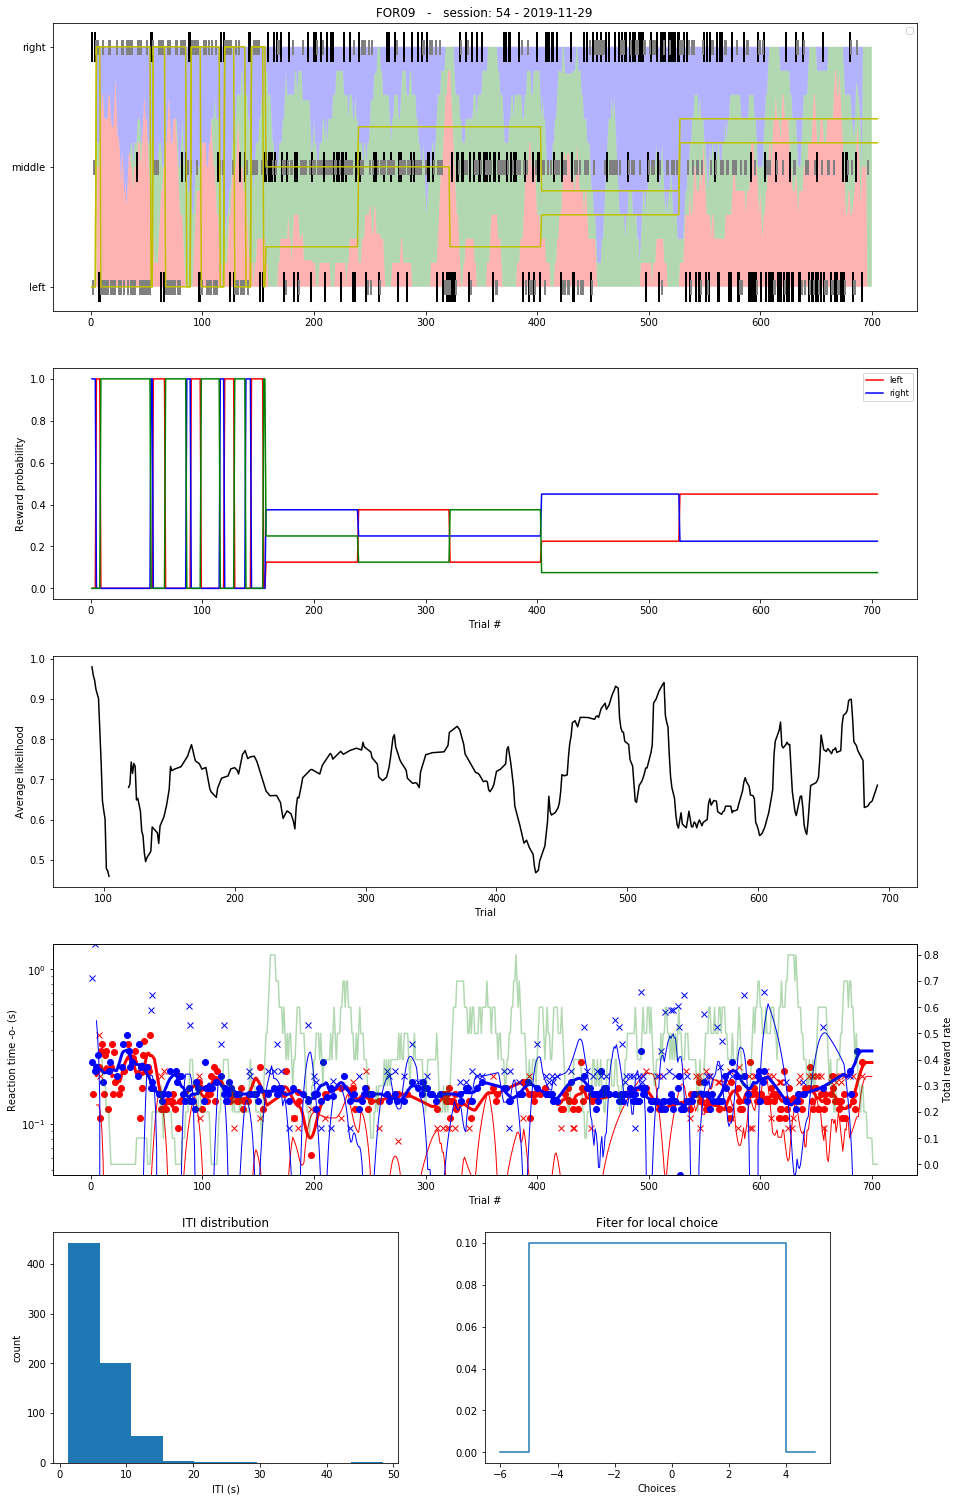

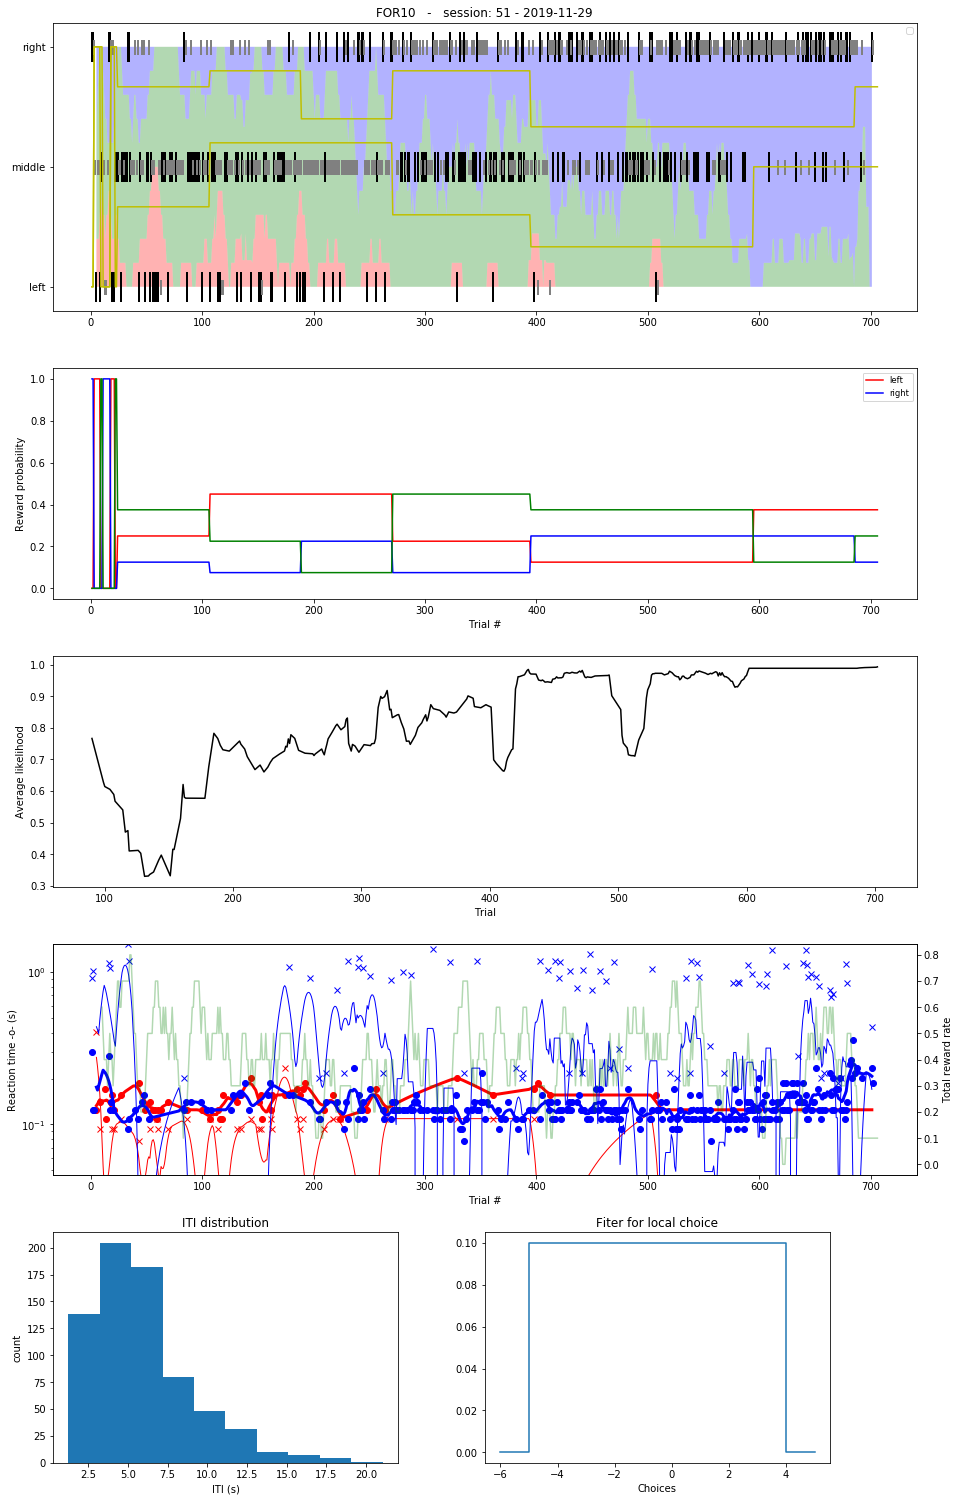

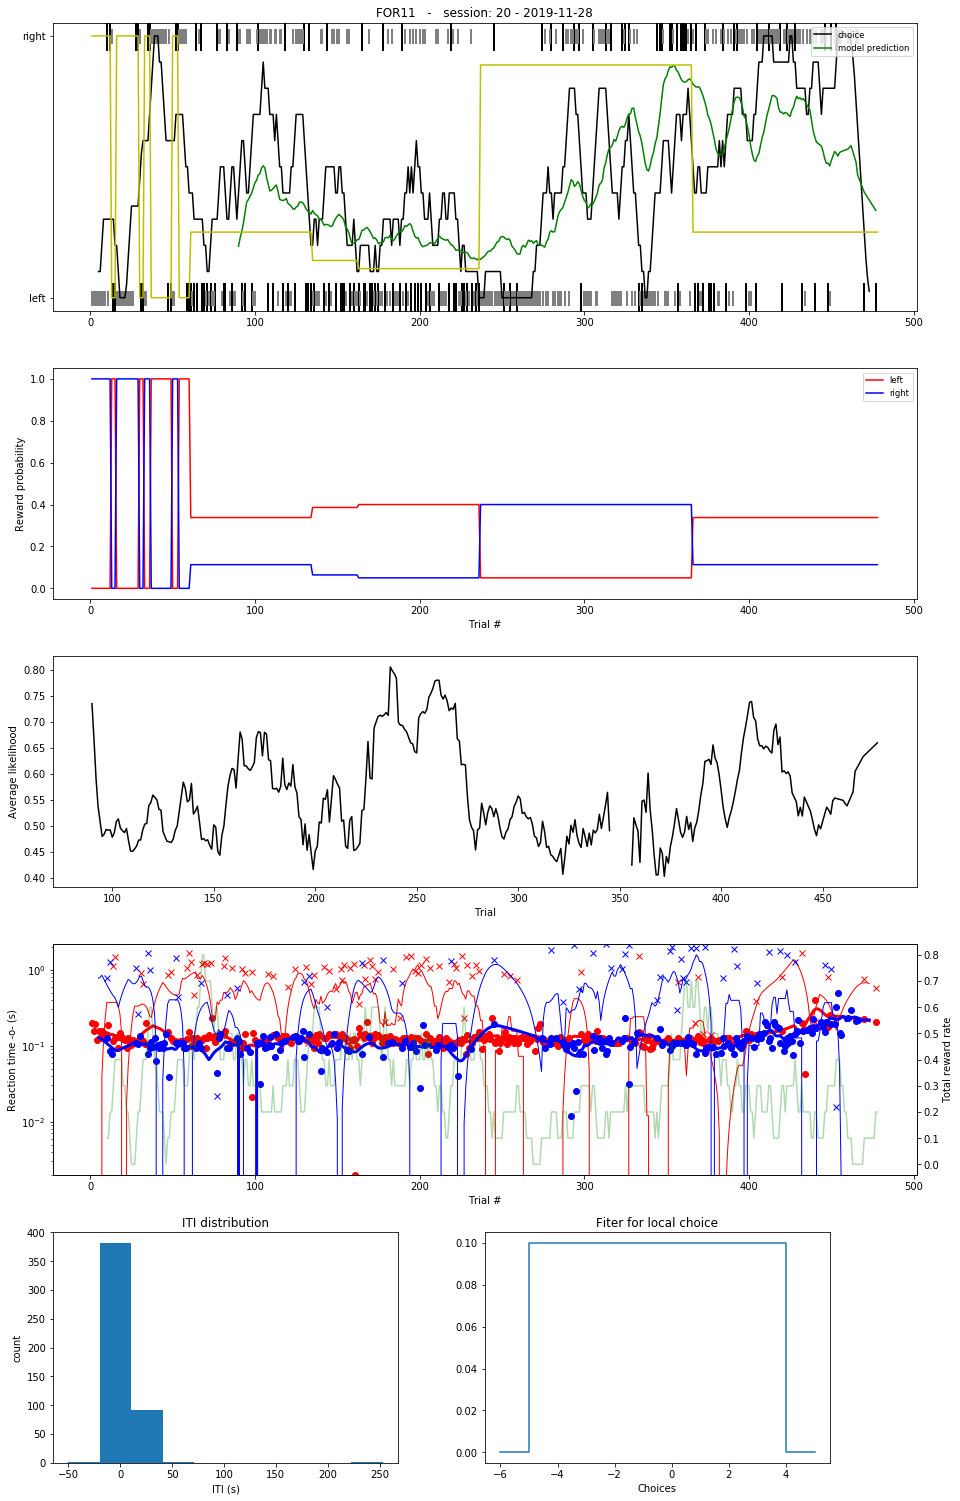

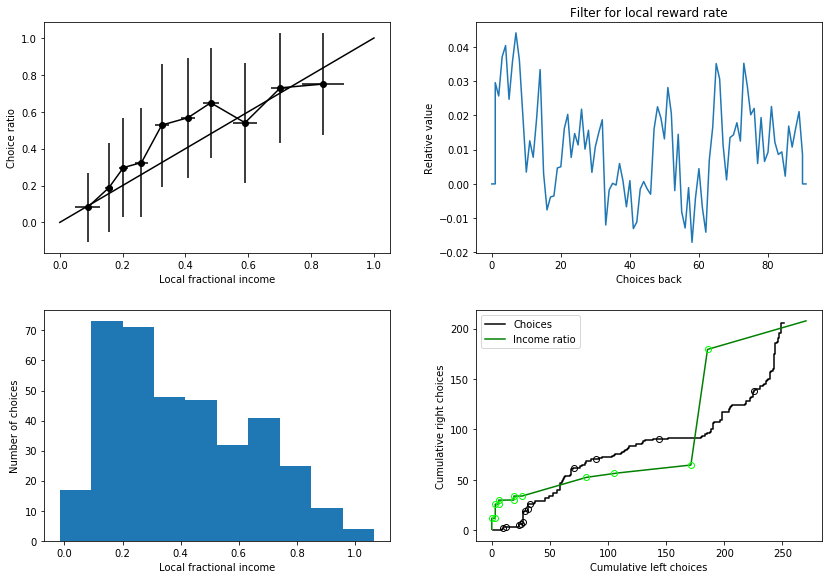

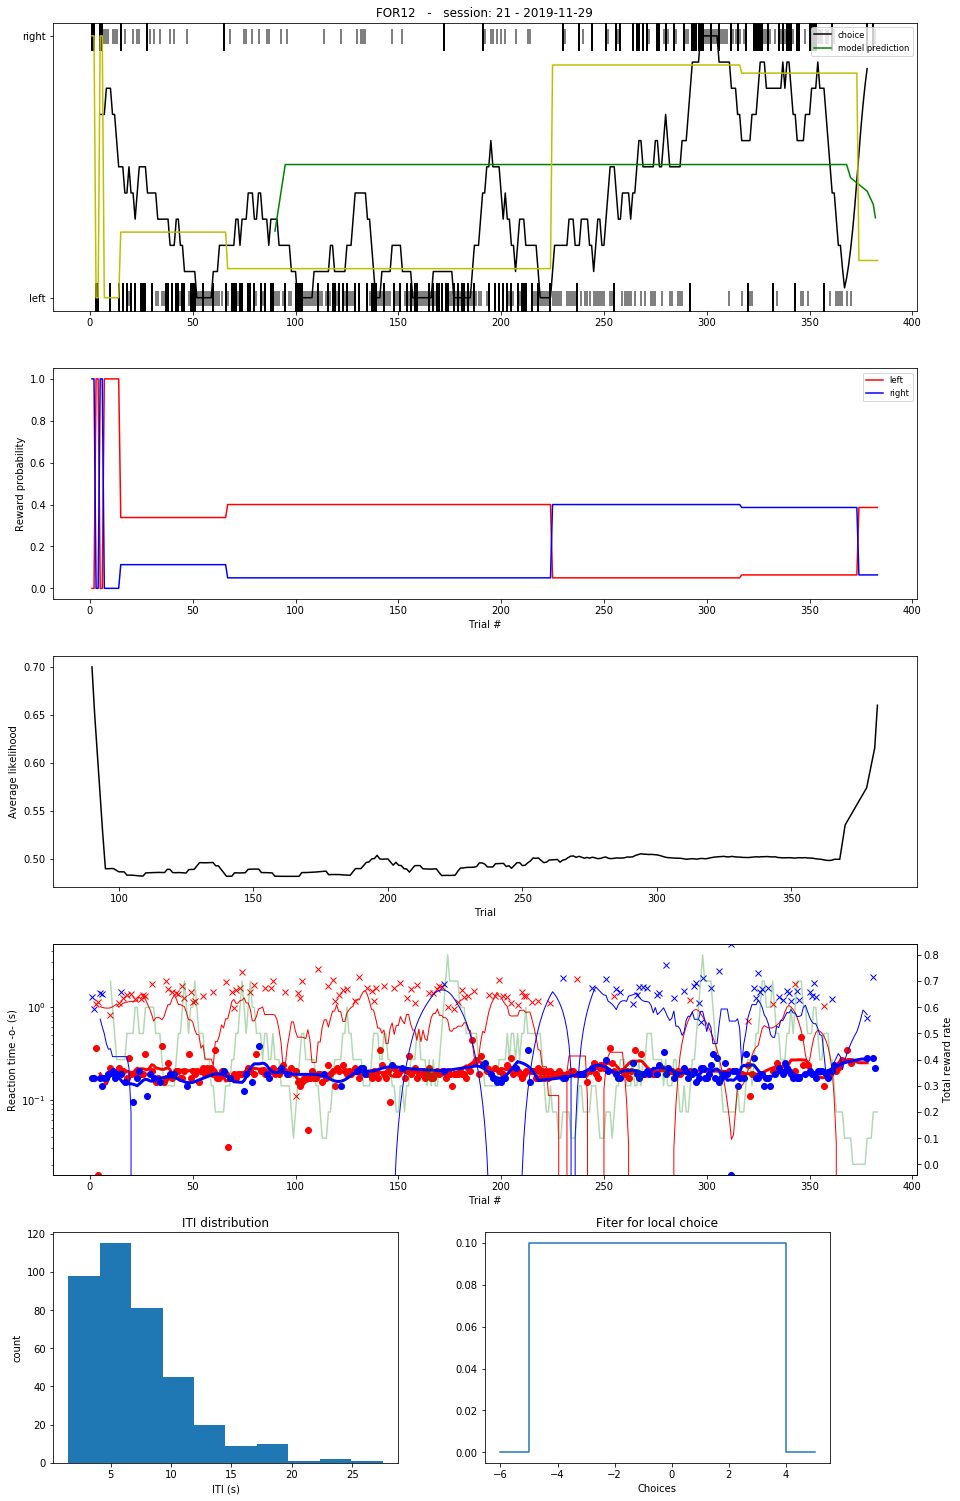

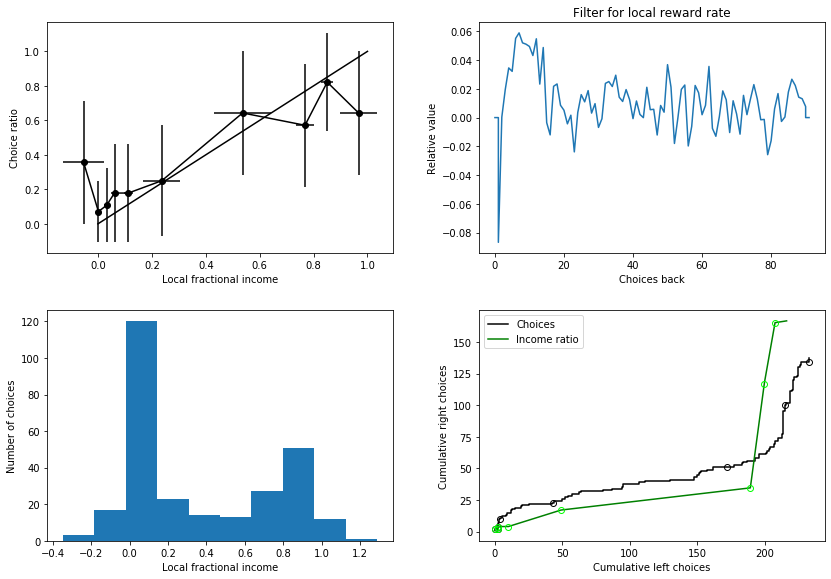

In [3]:
model = 'fitted fractional'
#plot_one_session(wr_name = 'FOR01',session = 'last',model = model)
#plot_one_session(wr_name = 'FOR02',session = 'last',model = model)
#plot_one_session(wr_name = 'FOR03',session = 'last',model = model)
#plot_one_session(wr_name = 'FOR04',session = 'last',model = model)
#plot_one_session(wr_name = 'FOR05',session = 'last',model = model)
#plot_one_session(wr_name = 'FOR06',session = 'last',model = model)
#plot_one_session(wr_name = 'FOR07',session = 'last',model = model)
#plot_one_session(wr_name = 'FOR08',session = 'last',model = model)
plot_one_session(wr_name = 'FOR09',session = 'last',model = model)
plot_one_session(wr_name = 'FOR10',session = 'last',model = model)
plot_one_session(wr_name = 'FOR11',session = 'last',model = model)
plot_one_session(wr_name = 'FOR12',session = 'last',model = model)
plot_one_session(wr_name = 'FOR13',session = 'last',model = model)
plot_one_session(wr_name = 'FOR14',session = 'last',model = model)
#plot_one_session(wr_name = 'HC16',session = 'last',model = model)


In [ ]:
model = 'fitted fractional'
plot_one_session(wr_name = 'HC16',session = 'last',model = model)

Behavior on block switches for all animals

In [ ]:
plot_block_switches()
plot_block_switches('FOR01')
plot_block_switches('FOR02')
plot_block_switches('FOR03')
plot_block_switches('FOR04')
plot_block_switches(sessions = [8, 14])
plot_block_switches(sessions = [15, 21])
plot_block_switches(sessions = [22, 28])

# Logistic regression session by session

In [ ]:
plotregressionaverage(sessions = [8,14])
plotregressionaverage(sessions = [15,21])
plotregressionaverage(sessions = [22,28])
